# Lab Assignment Five: Wide and Deep Networks

*Yiwen Xu, Kehan Zhang, Shuang Liang, Christopher Deng Jr*

# 1 Preparation 

# 1.1 Load Data

The data set is a combination of three different brands used car listing: <br>
Mercedes Used Car Listing: https://www.kaggle.com/mysarahmadbhat/mercedes-used-car-listing <br>
BMW Used Car Listing: https://www.kaggle.com/datasets/mysarahmadbhat/bmw-used-car-listing <br>
Audi Used Car Listing: https://www.kaggle.com/datasets/mysarahmadbhat/audi-used-car-listings <br>

We want to use the data to build a wide and deep network to predict the used cars' price and to find out if the used car has a standard price, or a luxury price

In [1]:
import pandas as pd

df_orig_1 = pd.read_csv('audi.csv')
df_orig_2 = pd.read_csv('BMW.csv')
df_orig_3 = pd.read_csv('merc.csv')



print(df_orig_1.info())
print(df_orig_2.info())
print(df_orig_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 no

For our purpose for the lab, we are ignoring the brand's name, and we checked if there's any duplicate model names. It turns out that there is no duplicates, so the model names would directly indicate the manufacture( brand ). 

In [2]:
temp_1 = pd.DataFrame(df_orig_1['model'].unique())
temp_2 = pd.DataFrame(df_orig_2['model'].unique())
temp_3 = pd.DataFrame(df_orig_3['model'].unique())

temp = pd.concat([temp_1,temp_2],axis=0, ignore_index=True)
temp = pd.concat([temp,temp_3],axis=0, ignore_index=True)
print('Do each brands\' model have duplicated name? \t', str(temp.duplicated().any()),'\n')

print('Audi\'s model:\n',df_orig_1['model'].unique(),'\n')
print('BMW\'s model:\n',df_orig_2['model'].unique(),'\n')
print('Merc\'s model:\n',df_orig_3['model'].unique(),'\n')


Do each brands' model have duplicated name? 	 False 

Audi's model:
 [' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7'] 

BMW's model:
 [' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'] 

Merc's model:
 [' SLK' ' S Class' ' SL CLASS' ' G Class' ' GLE Class' ' GLA Class'
 ' A Class' ' B Class' ' GLC Class' ' C Class' ' E Class' ' GL Class'
 ' CLS Class' ' CLC Class' ' CLA Class' ' V Class' ' M Class' ' CL Class'
 ' GLS Class' ' GLB Class' ' X-CLASS' '180' ' CLK' ' R Class' '230' '220'
 '200'] 



In [3]:
from copy import deepcopy

df_1 = deepcopy(df_orig_1)
df_2 = deepcopy(df_orig_2)
df_3 = deepcopy(df_orig_3)

df = pd.concat([df_1,df_2],axis=0, ignore_index=True)
df = pd.concat([df,df_3],axis=0, ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34568 entries, 0 to 34567
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         34568 non-null  object 
 1   year          34568 non-null  int64  
 2   price         34568 non-null  int64  
 3   transmission  34568 non-null  object 
 4   mileage       34568 non-null  int64  
 5   fuelType      34568 non-null  object 
 6   tax           34568 non-null  int64  
 7   mpg           34568 non-null  float64
 8   engineSize    34568 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.4+ MB


For our used car listing data, we are using the 

   model(object, the model of the car), 

   year(int, which year the car is manufactured), 

   price(int, the price of the car), 

   transmission(object, automatic or manual), 

   mileage(int, how many miles the car undergoes before sell), 

   fueltype(object, what kind of the fuel the car uses), 

   tax(int, road tax), 
   
   mpg(float, miles per galon),

   engineSize(float, size of the engine in liters) 
 
to build our wide and deep network.  

<AxesSubplot:>

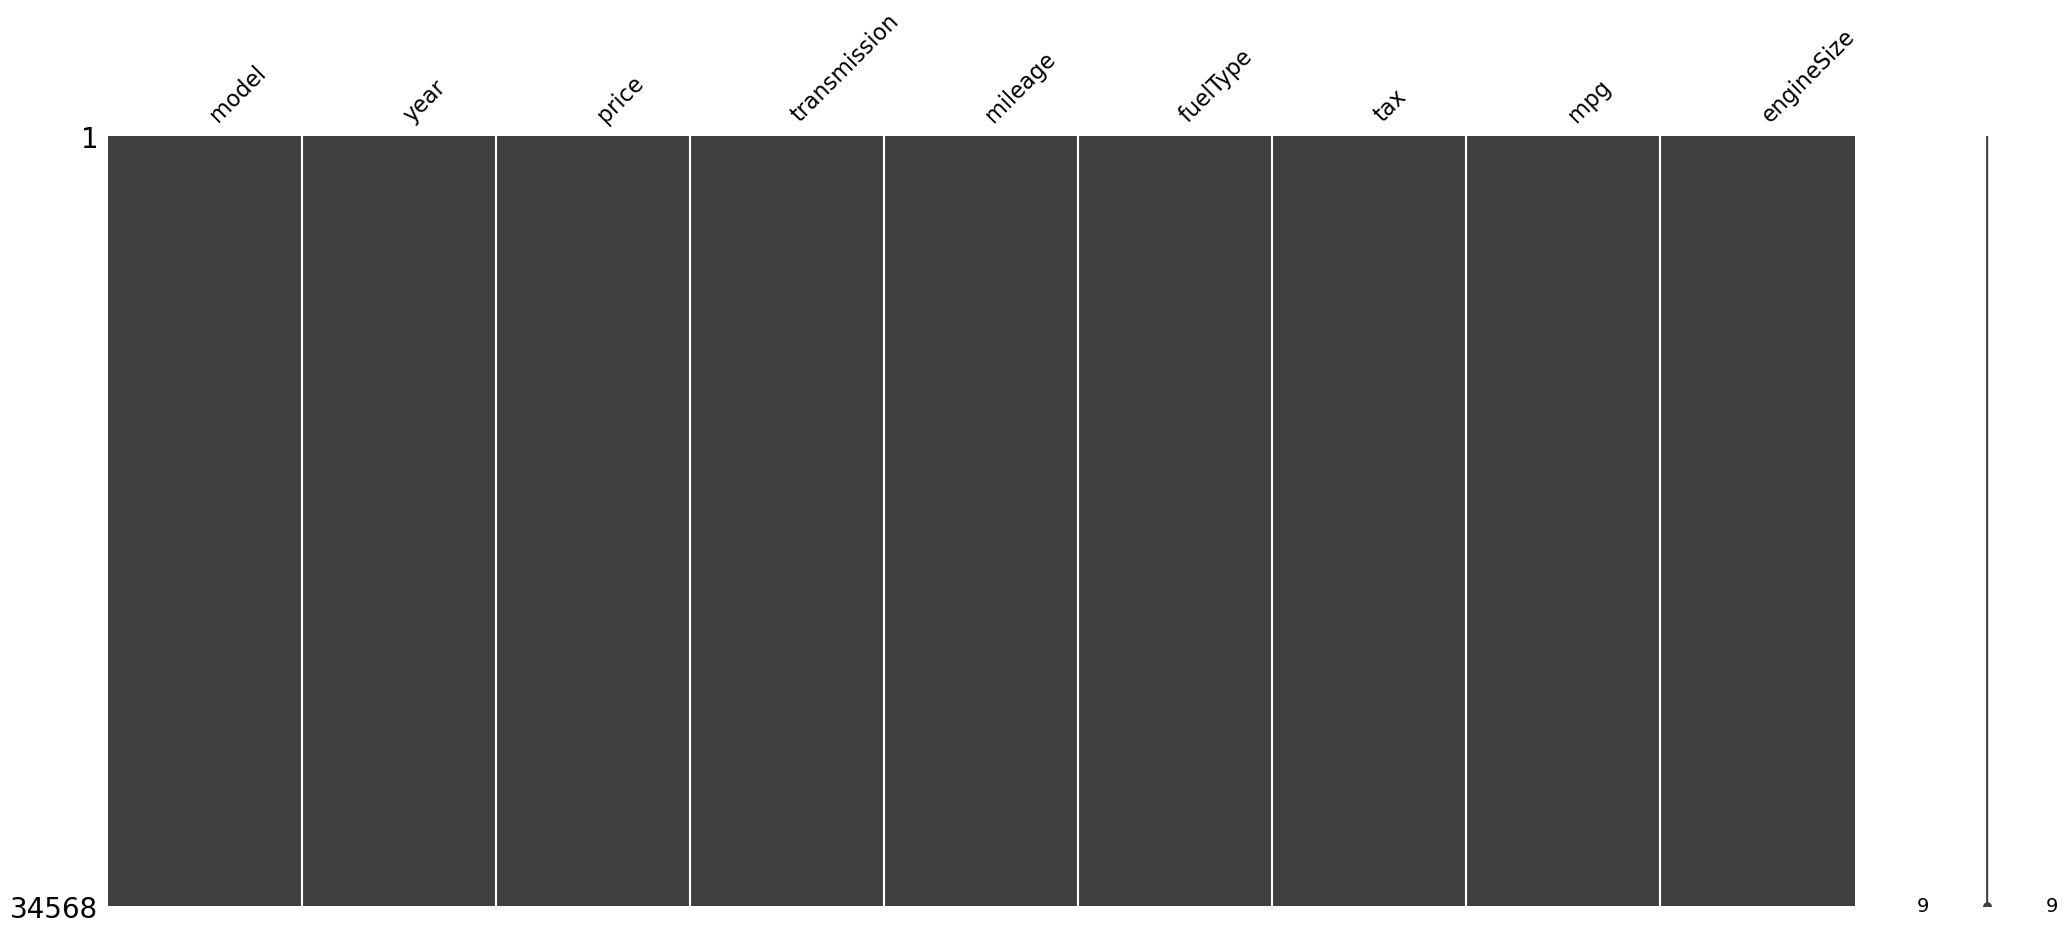

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno as mn
import warnings
warnings.filterwarnings('ignore')
# let's just get rid of rows with any missing data
# and then reset the indices of the dataframe so it corresponds to row number
mn.matrix(df)

We check if there's any empty or missing data entries and get rid of them. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f966372edf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96637443d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f966372eb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9663744970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9663744c40>],
 'means': []}

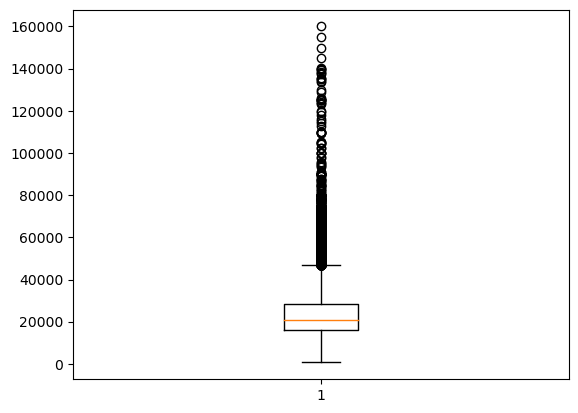

In [5]:
plt.boxplot(df.price)


We checked the price range of the used cars that are in the dataset and populated a box plot for it. We find out that the mean is around $20000.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9650428c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96504381f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9650428940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9650438790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9650438a60>],
 'means': []}

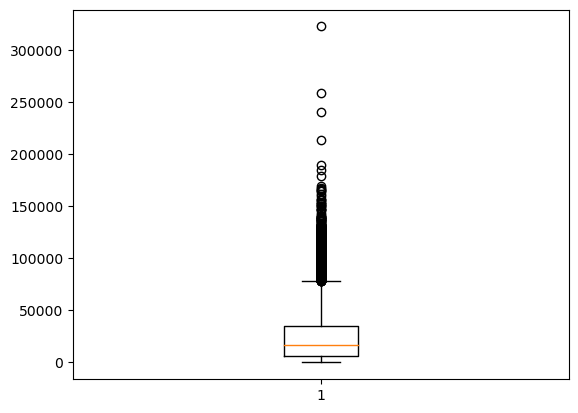

In [6]:
plt.boxplot(df.mileage)

We also checked the range of mileage of the used cars in the dataset. We find out the mileage have a very huge range. 

Based on the price information that we get, we decide to seperate the car's price into standard: less than 20000, and luxury: greater than 20000. We also find that this is good spliting point because the average amount of money American's spent on a used car is about 26000 (source: https://www.statista.com/statistics/274928/used-vehicle-average-selling-price-in-the-united-states/) <br>
For the mileage data, because the range is so wide and we don't want the numerical value to mess up our classification, we reclassify the mileage value into 4 even split bins: 

    relatively new, median, Aging, and old.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

target_var_name = 'price'

a = deepcopy(df['mileage'])


a = pd.cut(a, bins = 4, labels = ['relatively_new','median','Aging','old'])

y = df['price']
y = pd.cut(y, [-1,20000,df.price.max()], labels = ['Standard','Luxury'])

df['price_level'] = y
df['mileage_evalue'] = a

df = df.drop(columns = 'price')
df = df.drop(columns = 'mileage')


# y = df['price_level']
# X = df.drop(columns = 'price_level')


# print(y_test.value_counts())
# ========================================================
# define objects that can encode each variable as integer    
encoders = dict() # save each encoder in dictionary
categorical_headers = ['model','transmission',
                       'fuelType','mileage_evalue']

# train all encoders (special case the target 'income')
for col in categorical_headers+["price_level"]:
#   df_train[col] = df_train[col].str.strip()
#    df_test[col] = df_test[col].str.strip()
    df[col] = df[col].str.strip()
    if col=="price_level":
        # special case the target, just replace the column
        tmp = LabelEncoder()
        df[col] = tmp.fit_transform(df[col])
        #df_test[col] = tmp.transform(df_test[col])
    else:
        # integer encode strings that are features
        encoders[col] = LabelEncoder() # save the encoder
        df[col+'_int'] = encoders[col].fit_transform(df[col])
        #df_test[col+'_int'] = encoders[col].transform(df_test[col])

# ========================================================
# scale the numeric, continuous variables
numeric_headers =["year", "tax", "mpg", "engineSize"]

for col in numeric_headers:
    df[col] = df[col].astype(np.float)
    #df_train[col] = df_train[col].astype(np.float)
    #df_test[col] = df_test[col].astype(np.float)
    
    ss = StandardScaler()
    df[col] = ss.fit_transform(df[col].values.reshape(-1, 1))
    #df_test[col] = ss.transform(df_test[col].values.reshape(-1, 1))
    
df.head()

# y = df['price_level']
# X = df.drop(columns = 'price_level')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


,model,year,transmission,fuelType,tax,mpg,engineSize,price_level,mileage_evalue,model_int,transmission_int,fuelType_int,mileage_evalue_int
0,A1,-0.074753,Manual,Petrol,0.319813,0.056950,-1.127943,1,relatively_new,13,1,4,3
1,A6,-0.519359,Automatic,Diesel,-1.687645,0.471152,-0.099557,1,relatively_new,18,0,0,3
2,A1,-0.519359,Manual,Petrol,-1.533225,0.056950,-1.127943,1,relatively_new,13,1,4,3
3,A4,-0.074753,Automatic,Diesel,0.242603,0.617064,-0.099557,1,relatively_new,16,0,0,3
4,A3,0.814461,Manual,Petrol,0.242603,-0.216047,-1.813534,1,relatively_new,15,1,4,3


We check the difference between the number of data entries between the two categories and find out that it is very small. 

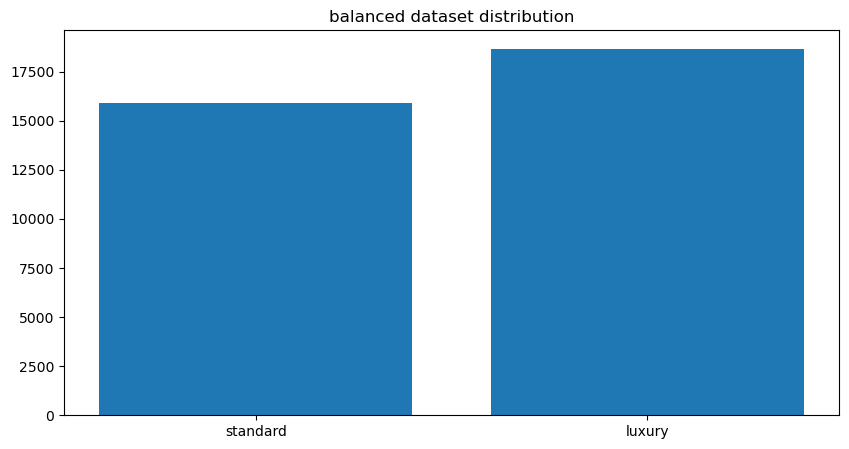

In [8]:
num = []
label = ['standard','luxury']

num.append((df['price_level']==1).sum())
num.append((df['price_level']==0).sum())

fig = plt.figure(figsize=(10,5))
plt.bar(label,num)
plt.title('balanced dataset distribution')
plt.show()

## 1.2 Identify groups of features
For grouping our features, we choose to group model with transmission, model with fuelType, transmission with fuelType, mileage with model, and mileage with fuelType. All of the resulted grouped features have a datatype of Int. We choose to group our features this way because we believe that this is how people pick their cars. For example, people will want a sedan that uses petorl, or an SUV that uses diesel. Creating these grouped features will help our model better suit our targeted group of customers that want specific types of car. 

In [9]:
cross_columns = [['model','transmission'],
                 ['model','fuelType'],
                 ['transmission','fuelType'],
                 ['mileage_evalue','model'],
                 ['mileage_evalue','fuelType'],
                ]

cross_col_df_names = []
for cols_list in cross_columns:
    enc = LabelEncoder()
    
    X_crossed = df[cols_list].astype(str).apply(lambda x: '_'.join(x), axis=1)
    cross_col_name = '_'.join(cols_list)
    enc.fit(X_crossed)
    df[cross_col_name] = enc.transform(X_crossed)
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['model_transmission',
 'model_fuelType',
 'transmission_fuelType',
 'mileage_evalue_model',
 'mileage_evalue_fuelType']

In [10]:
df.head()

,model,year,transmission,fuelType,tax,mpg,engineSize,price_level,mileage_evalue,model_int,transmission_int,fuelType_int,mileage_evalue_int,model_transmission,model_fuelType,transmission_fuelType,mileage_evalue_model,mileage_evalue_fuelType
0,A1,-0.074753,Manual,Petrol,0.319813,0.056950,-1.127943,1,relatively_new,13,1,4,3,29,31,6,76,11
1,A6,-0.519359,Automatic,Diesel,-1.687645,0.471152,-0.099557,1,relatively_new,18,0,0,3,41,40,0,80,7
2,A1,-0.519359,Manual,Petrol,-1.533225,0.056950,-1.127943,1,relatively_new,13,1,4,3,29,31,6,76,11
3,A4,-0.074753,Automatic,Diesel,0.242603,0.617064,-0.099557,1,relatively_new,16,0,0,3,35,36,0,78,7
4,A3,0.814461,Manual,Petrol,0.242603,-0.216047,-1.813534,1,relatively_new,15,1,4,3,33,35,6,77,11


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34568 entries, 0 to 34567
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   model                    34568 non-null  object 
 1   year                     34568 non-null  float64
 2   transmission             34568 non-null  object 
 3   fuelType                 34568 non-null  object 
 4   tax                      34568 non-null  float64
 5   mpg                      34568 non-null  float64
 6   engineSize               34568 non-null  float64
 7   price_level              34568 non-null  int64  
 8   mileage_evalue           34568 non-null  object 
 9   model_int                34568 non-null  int64  
 10  transmission_int         34568 non-null  int64  
 11  fuelType_int             34568 non-null  int64  
 12  mileage_evalue_int       34568 non-null  int64  
 13  model_transmission       34568 non-null  int64  
 14  model_fuelType        

# 1.3  The Metric that are going to use to evaluate our algorithm’s performance.
We choose to use F1 Score as the metric to evaluate the peroformance. We choose F1 score because it sums up the predictive performance of our model by combining both  precision and recall. For our model, it is preidicting the car price into two different categories: standard and luxury. We don't want to use accuracy as our metrics because we will be ignoring the false positives and false negatives. We want our model to weight false positives and false negatives equally important. 

# 1.4 Dividing the Data
For diving our data, we choose to do the 80/20 split. We choose to do this because we have enough data entries over 30K. We also believe that we don't need to do cross validation also because we have enough data entries so over fitting shouldn't occur. 

In [12]:
y = df['price_level']
X = df.drop(columns = 'price_level')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [13]:
print('train:', y_train.shape[0]/y.shape[0])
print('test:', y_test.shape[0]/y.shape[0])

train: 0.7999884286044897
test: 0.2000115713955103


In [14]:
categorical_headers_ints = [x+'_int' for x in categorical_headers]
print(categorical_headers_ints)
X_train.head()

['model_int', 'transmission_int', 'fuelType_int', 'mileage_evalue_int']


,model,year,transmission,fuelType,tax,mpg,engineSize,mileage_evalue,model_int,transmission_int,fuelType_int,mileage_evalue_int,model_transmission,model_fuelType,transmission_fuelType,mileage_evalue_model,mileage_evalue_fuelType
25005,GLA Class,-0.074753,Automatic,Diesel,0.242603,0.108725,0.071840,relatively_new,31,0,0,3,72,68,0,93,7
33996,GLA Class,0.369854,Manual,Diesel,0.242603,0.617064,0.071840,relatively_new,31,1,0,3,73,68,5,93,7
7556,Q3,-0.519359,Semi-Auto,Diesel,0.242603,0.005175,-0.099557,relatively_new,43,3,0,3,104,89,9,105,7
13548,X1,1.259067,Semi-Auto,Diesel,0.242603,0.278171,-0.099557,relatively_new,66,3,0,3,156,125,9,128,7
33560,C Class,0.369854,Manual,Petrol,0.242603,-0.216047,-0.099557,relatively_new,22,1,4,3,53,51,6,84,11


# 2 Modeling

In [15]:
import tensorflow as tf
from tensorflow import keras
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


In [16]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model

In [17]:
from sklearn import metrics as mt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [18]:
from keras import backend as K
def Precision(y_true, y_pred):
    """Precision"""
    tp= K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # TP
    pp= K.sum(K.round(K.clip(y_pred, 0, 1))) # TP + FP
    precision = tp/ (pp + K.epsilon())
    return precision
    
def Recall(y_true, y_pred):
    """Recall"""
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) # TP
    pp = K.sum(K.round(K.clip(y_true, 0, 1))) # TP + FN
    recall = tp / (pp + K.epsilon())
    return recall
 
def F1(y_true, y_pred):
    """F1-score"""
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1  

Because Keras doesn't provide recall metrics, we define Recall, Precision and F1 evaluation metrics here. 

## 2.1  Wide and deep models with different crossed columns

In [19]:
for col in categorical_headers:
    vals = df[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals,'\n')
print('==================After LabelEncode====================\n')    
for col in categorical_headers_ints:
    vals = df[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals,'\n')

model has 77 unique values:
['A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5' 'S8' 'SQ7' 'S3' 'S5' 'A2' 'RS7'
 '5 Series' '6 Series' '1 Series' '7 Series' '2 Series' '4 Series' 'X3'
 '3 Series' 'X5' 'X4' 'i3' 'X1' 'M4' 'X2' 'X6' '8 Series' 'Z4' 'X7' 'M5'
 'i8' 'M2' 'M3' 'M6' 'Z3' 'SLK' 'S Class' 'SL CLASS' 'G Class' 'GLE Class'
 'GLA Class' 'A Class' 'B Class' 'GLC Class' 'C Class' 'E Class'
 'GL Class' 'CLS Class' 'CLC Class' 'CLA Class' 'V Class' 'M Class'
 'CL Class' 'GLS Class' 'GLB Class' 'X-CLASS' '180' 'CLK' 'R Class' '230'
 '220' '200'] 

transmission has 4 unique values:
['Manual' 'Automatic' 'Semi-Auto' 'Other'] 

fuelType has 5 unique values:
['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric'] 

mileage_evalue has 4 unique values:
['relatively_new' 'median' 'Aging' 'old'] 

==================After LabelEncode====================

model_int has 77 unique values:
[13 18 16 15 43 44 17 56 42 19 63 45 52 49 20 46 50 51 48 61 5

In this section, we created three wide and deep networks.

- Model 1:
    3 Crossed Columns: ['model','transmission'], ['model','fuelType'], ['transmission','fuelType']
- Model 2:
    2 Crossed Columns: ['mileage_evalue','model'], ['mileage_evalue','fuelType']
- Model 3:
    3 Crossed Columns: ['model','transmission'], ['transmission','fuelType'], ['mileage_evalue','fuelType']

### 2.1.1 Model 1

In [20]:
# we already save the coressed lable in the DataFrame

# choose these as a class
cross_columns = [
                 ['model','transmission'],
#                  ['model','fuelType'],
                 ['transmission','fuelType'],
                 ['mileage_evalue','model'],
#                  ['mileage_evalue','fuelType']
                ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:

    cross_col_name = '_'.join(cols_list)
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['model_transmission', 'transmission_fuelType', 'mileage_evalue_model']

In [21]:
# get crossed columns
X_train_crossed = X_train[cross_col_df_names].to_numpy()
X_test_crossed = X_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = X_train[categorical_headers_ints].to_numpy() 
X_test_cat = X_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()

# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model_1 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)



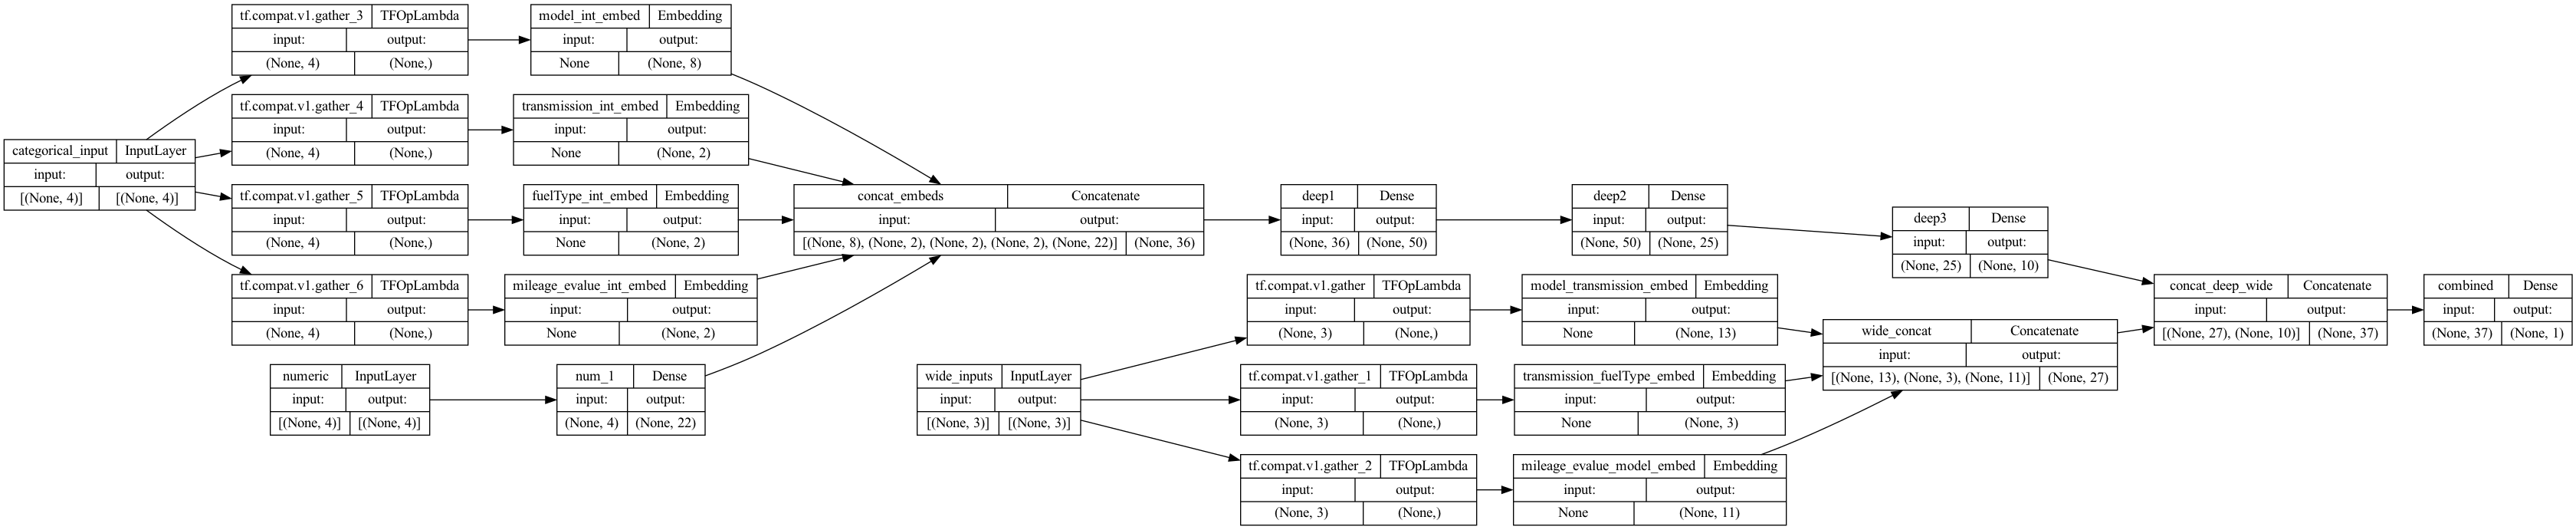

In [22]:
plot_model(
    model_1, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [23]:
%%time

model_1.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[F1])


# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model_1.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=80, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/80
865/865 [==============================] - 1s 1ms/step - loss: 0.2434 - F1: 0.6686 - val_loss: 0.2313 - val_F1: 0.7957
Epoch 2/80
865/865 [==============================] - 1s 842us/step - loss: 0.2199 - F1: 0.8399 - val_loss: 0.2086 - val_F1: 0.8629
Epoch 3/80
865/865 [==============================] - 1s 849us/step - loss: 0.1971 - F1: 0.8652 - val_loss: 0.1855 - val_F1: 0.8713
Epoch 4/80
865/865 [==============================] - 1s 828us/step - loss: 0.1751 - F1: 0.8706 - val_loss: 0.1644 - val_F1: 0.8740
Epoch 5/80
865/865 [==============================] - 1s 836us/step - loss: 0.1554 - F1: 0.8708 - val_loss: 0.1457 - val_F1: 0.8711
Epoch 6/80
865/865 [==============================] - 1s 847us/step - loss: 0.1383 - F1: 0.8670 - val_loss: 0.1296 - val_F1: 0.8697
Epoch 7/80
865/865 [==============================] - 1s 837us/step - loss: 0.1239 - F1: 0.8662 - val_loss: 0.1166 - val_F1: 0.8702
Epoch 8/80
865/865 [==============================] - 1s 833us/step - loss: 0.

Epoch 63/80
865/865 [==============================] - 1s 851us/step - loss: 0.0730 - F1: 0.8870 - val_loss: 0.0702 - val_F1: 0.8884
Epoch 64/80
865/865 [==============================] - 1s 845us/step - loss: 0.0728 - F1: 0.8851 - val_loss: 0.0699 - val_F1: 0.8888
Epoch 65/80
865/865 [==============================] - 1s 849us/step - loss: 0.0726 - F1: 0.8855 - val_loss: 0.0697 - val_F1: 0.8896
Epoch 66/80
865/865 [==============================] - 1s 838us/step - loss: 0.0724 - F1: 0.8867 - val_loss: 0.0695 - val_F1: 0.8902
Epoch 67/80
865/865 [==============================] - 1s 856us/step - loss: 0.0722 - F1: 0.8878 - val_loss: 0.0693 - val_F1: 0.8915
Epoch 68/80
865/865 [==============================] - 1s 855us/step - loss: 0.0720 - F1: 0.8883 - val_loss: 0.0690 - val_F1: 0.8917
Epoch 69/80
865/865 [==============================] - 1s 862us/step - loss: 0.0718 - F1: 0.8879 - val_loss: 0.0688 - val_F1: 0.8923
Epoch 70/80
865/865 [==============================] - 1s 920us/step 

In [24]:
yhat = np.round(model_1.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

217/217 [==============================] - 0s 497us/step
[[3483  280]
 [ 334 2817]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3763
           1       0.91      0.89      0.90      3151

    accuracy                           0.91      6914
   macro avg       0.91      0.91      0.91      6914
weighted avg       0.91      0.91      0.91      6914



Text(0.5, 0, 'epochs')

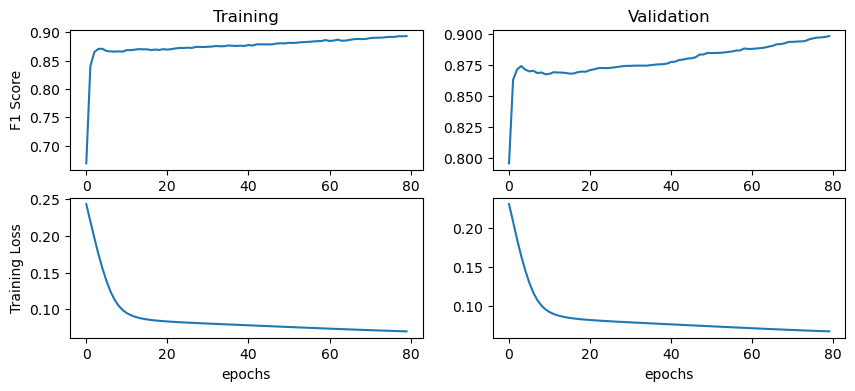

In [25]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['F1'])

plt.ylabel('F1 Score')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_F1'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [26]:
y_pred_1 = model_1.predict([X_test_crossed,X_test_cat,X_test_num]).ravel()
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_1)
auc_1 = auc(fpr_1, tpr_1)

217/217 [==============================] - 0s 481us/step


In [27]:
F1(tf.cast(y_test, tf.float32), (y_pred_1))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9017285>

### 2.1.2 Model 2

In [28]:
# choose these as a class
cross_columns = [
#                  ['model','transmission'],
#                  ['model','fuelType'],
#                  ['transmission','fuelType'],
                 ['mileage_evalue','model'],
                 ['mileage_evalue','fuelType']
                ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:

    cross_col_name = '_'.join(cols_list)
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names


['mileage_evalue_model', 'mileage_evalue_fuelType']

In [29]:
# get crossed columns
X_train_crossed = X_train[cross_col_df_names].to_numpy()
X_test_crossed = X_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = X_train[categorical_headers_ints].to_numpy() 
X_test_cat = X_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()

# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model_2 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)



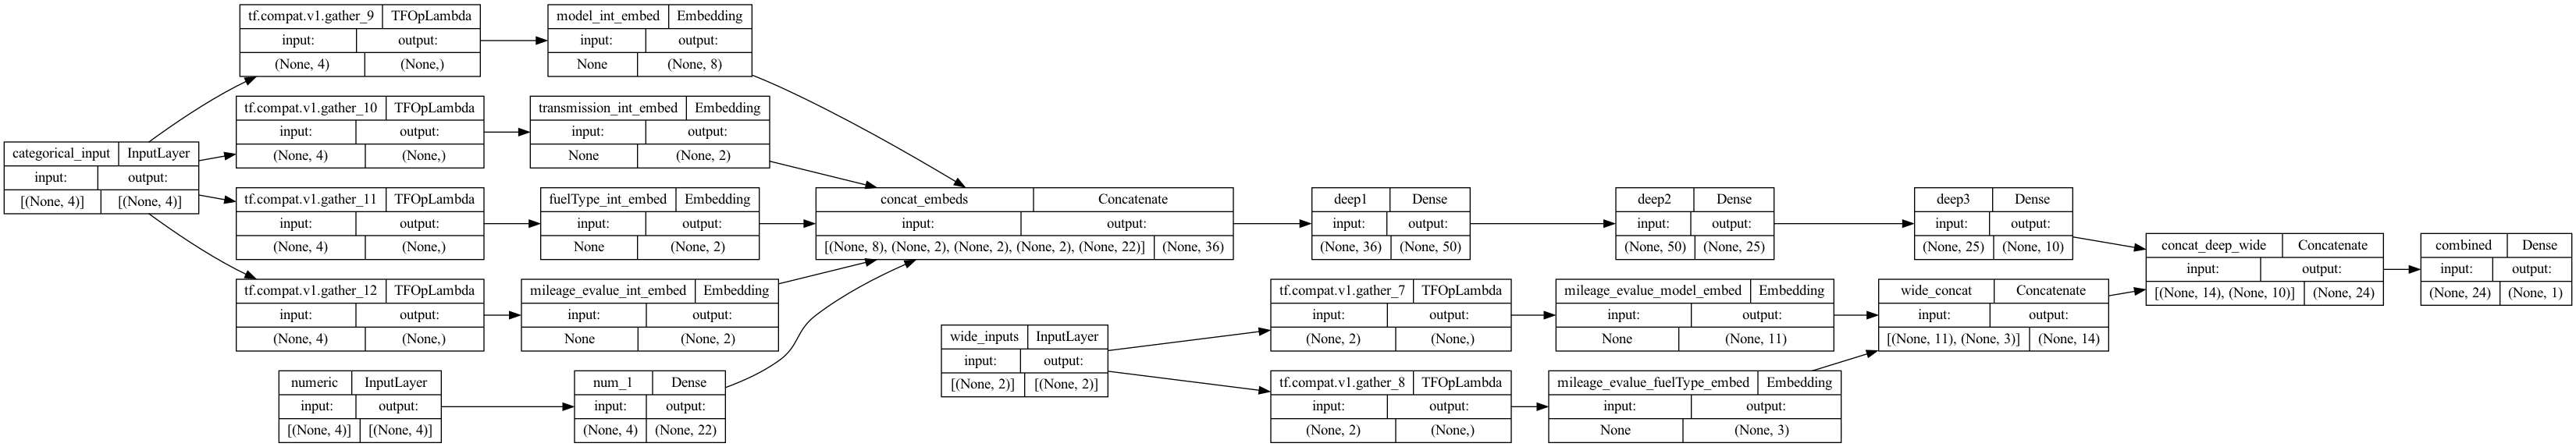

In [30]:
plot_model(
    model_2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [31]:
%%time

model_2.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[F1])

history = model_2.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=80, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/80
865/865 [==============================] - 1s 1ms/step - loss: 0.2399 - F1: 0.6592 - val_loss: 0.2275 - val_F1: 0.7419
Epoch 2/80
865/865 [==============================] - 1s 860us/step - loss: 0.2160 - F1: 0.7994 - val_loss: 0.2048 - val_F1: 0.8222
Epoch 3/80
865/865 [==============================] - 1s 851us/step - loss: 0.1942 - F1: 0.8237 - val_loss: 0.1832 - val_F1: 0.8342
Epoch 4/80
865/865 [==============================] - 1s 855us/step - loss: 0.1737 - F1: 0.8370 - val_loss: 0.1634 - val_F1: 0.8485
Epoch 5/80
865/865 [==============================] - 1s 862us/step - loss: 0.1551 - F1: 0.8437 - val_loss: 0.1454 - val_F1: 0.8496
Epoch 6/80
865/865 [==============================] - 1s 893us/step - loss: 0.1385 - F1: 0.8469 - val_loss: 0.1298 - val_F1: 0.8518
Epoch 7/80
865/865 [==============================] - 1s 844us/step - loss: 0.1246 - F1: 0.8503 - val_loss: 0.1172 - val_F1: 0.8523
Epoch 8/80
865/865 [==============================] - 1s 850us/step - loss: 0.

Epoch 63/80
865/865 [==============================] - 1s 819us/step - loss: 0.0692 - F1: 0.8926 - val_loss: 0.0657 - val_F1: 0.8983
Epoch 64/80
865/865 [==============================] - 1s 831us/step - loss: 0.0690 - F1: 0.8921 - val_loss: 0.0655 - val_F1: 0.8994
Epoch 65/80
865/865 [==============================] - 1s 857us/step - loss: 0.0688 - F1: 0.8938 - val_loss: 0.0653 - val_F1: 0.9002
Epoch 66/80
865/865 [==============================] - 1s 830us/step - loss: 0.0686 - F1: 0.8948 - val_loss: 0.0651 - val_F1: 0.9008
Epoch 67/80
865/865 [==============================] - 1s 819us/step - loss: 0.0684 - F1: 0.8949 - val_loss: 0.0649 - val_F1: 0.9010
Epoch 68/80
865/865 [==============================] - 1s 843us/step - loss: 0.0682 - F1: 0.8956 - val_loss: 0.0647 - val_F1: 0.9009
Epoch 69/80
865/865 [==============================] - 1s 841us/step - loss: 0.0681 - F1: 0.8957 - val_loss: 0.0645 - val_F1: 0.9011
Epoch 70/80
865/865 [==============================] - 1s 832us/step 

In [32]:
yhat = np.round(model_2.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

217/217 [==============================] - 0s 495us/step
[[3521  242]
 [ 331 2820]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3763
           1       0.92      0.89      0.91      3151

    accuracy                           0.92      6914
   macro avg       0.92      0.92      0.92      6914
weighted avg       0.92      0.92      0.92      6914



Text(0.5, 0, 'epochs')

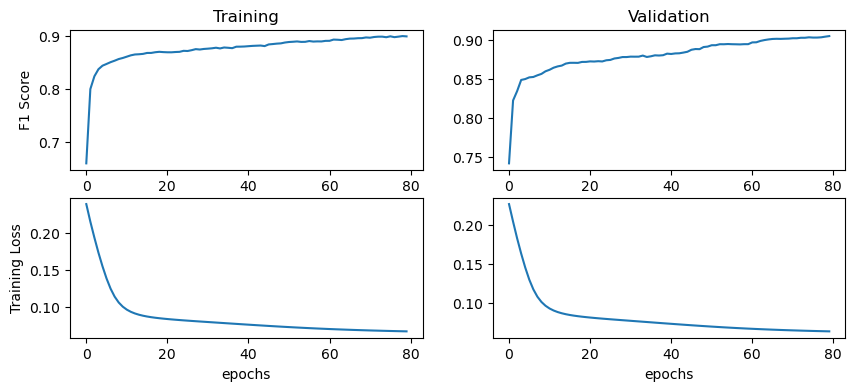

In [33]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['F1'])

plt.ylabel('F1 Score')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_F1'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [34]:
y_pred_2 = model_2.predict([X_test_crossed,X_test_cat,X_test_num]).ravel()
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_2)
auc_2 = auc(fpr_2, tpr_2)

217/217 [==============================] - 0s 490us/step


### 2.1.3 Model 3

In [35]:
# choose these as a class
cross_columns = [
                 ['model','transmission'],
#                  ['model','fuelType'],
                 ['transmission','fuelType'],
#                  ['mileage_evalue','model'],
                 ['mileage_evalue','fuelType']
                ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:

    cross_col_name = '_'.join(cols_list)
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['model_transmission', 'transmission_fuelType', 'mileage_evalue_fuelType']

In [36]:
# get crossed columns
X_train_crossed = X_train[cross_col_df_names].to_numpy()
X_test_crossed = X_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = X_train[categorical_headers_ints].to_numpy() 
X_test_cat = X_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()

# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model_3 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)



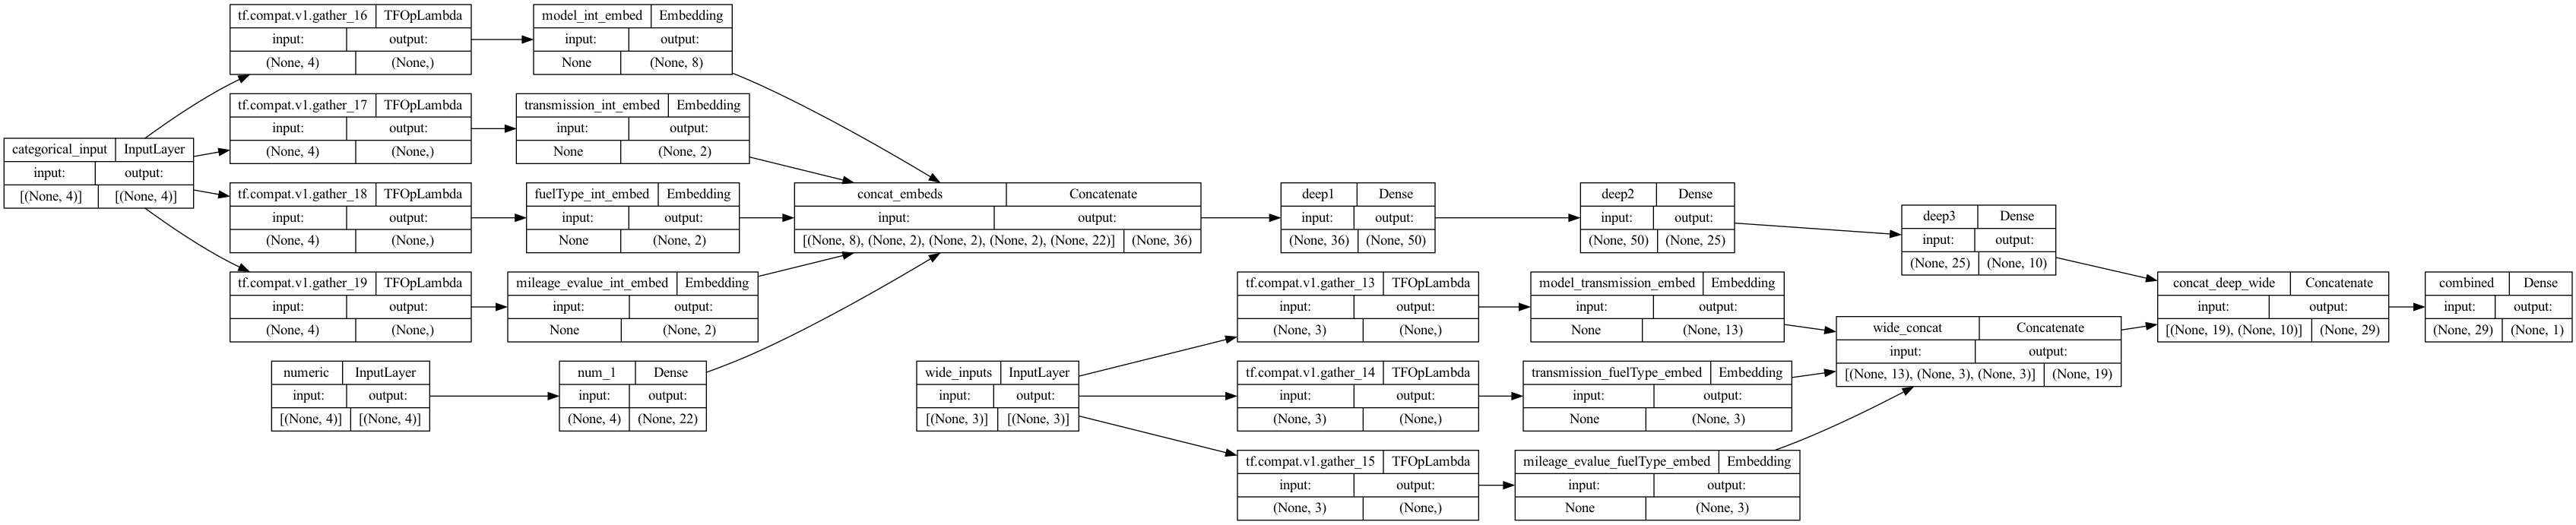

In [37]:
plot_model(
    model_3, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [38]:
%%time

model_3.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[F1])

history = model_3.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=80, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/80
865/865 [==============================] - 1s 986us/step - loss: 0.2405 - F1: 0.0297 - val_loss: 0.2249 - val_F1: 0.0980
Epoch 2/80
865/865 [==============================] - 1s 851us/step - loss: 0.2129 - F1: 0.4108 - val_loss: 0.1994 - val_F1: 0.6254
Epoch 3/80
865/865 [==============================] - 1s 909us/step - loss: 0.1891 - F1: 0.6958 - val_loss: 0.1770 - val_F1: 0.7459
Epoch 4/80
865/865 [==============================] - 1s 856us/step - loss: 0.1681 - F1: 0.7653 - val_loss: 0.1570 - val_F1: 0.8006
Epoch 5/80
865/865 [==============================] - 1s 876us/step - loss: 0.1494 - F1: 0.8118 - val_loss: 0.1397 - val_F1: 0.8410
Epoch 6/80
865/865 [==============================] - 1s 895us/step - loss: 0.1336 - F1: 0.8385 - val_loss: 0.1255 - val_F1: 0.8511
Epoch 7/80
865/865 [==============================] - 1s 946us/step - loss: 0.1208 - F1: 0.8468 - val_loss: 0.1142 - val_F1: 0.8558
Epoch 8/80
865/865 [==============================] - 1s 895us/step - loss: 

In [39]:
yhat = np.round(model_3.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

217/217 [==============================] - 0s 520us/step
[[3491  272]
 [ 326 2825]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3763
           1       0.91      0.90      0.90      3151

    accuracy                           0.91      6914
   macro avg       0.91      0.91      0.91      6914
weighted avg       0.91      0.91      0.91      6914



Text(0.5, 0, 'epochs')

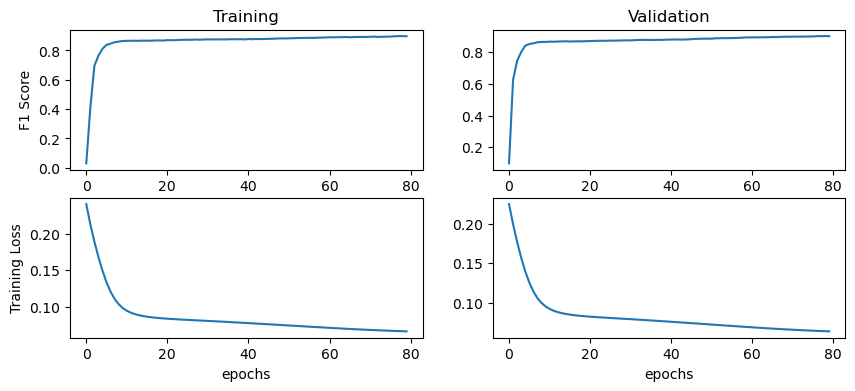

In [40]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['F1'])

plt.ylabel('F1 Score')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_F1'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [41]:
y_pred_3 = model_3.predict([X_test_crossed,X_test_cat,X_test_num]).ravel()
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_pred_3)
auc_3 = auc(fpr_3, tpr_3)

217/217 [==============================] - 0s 475us/step


### 2.1.4 Comparision 

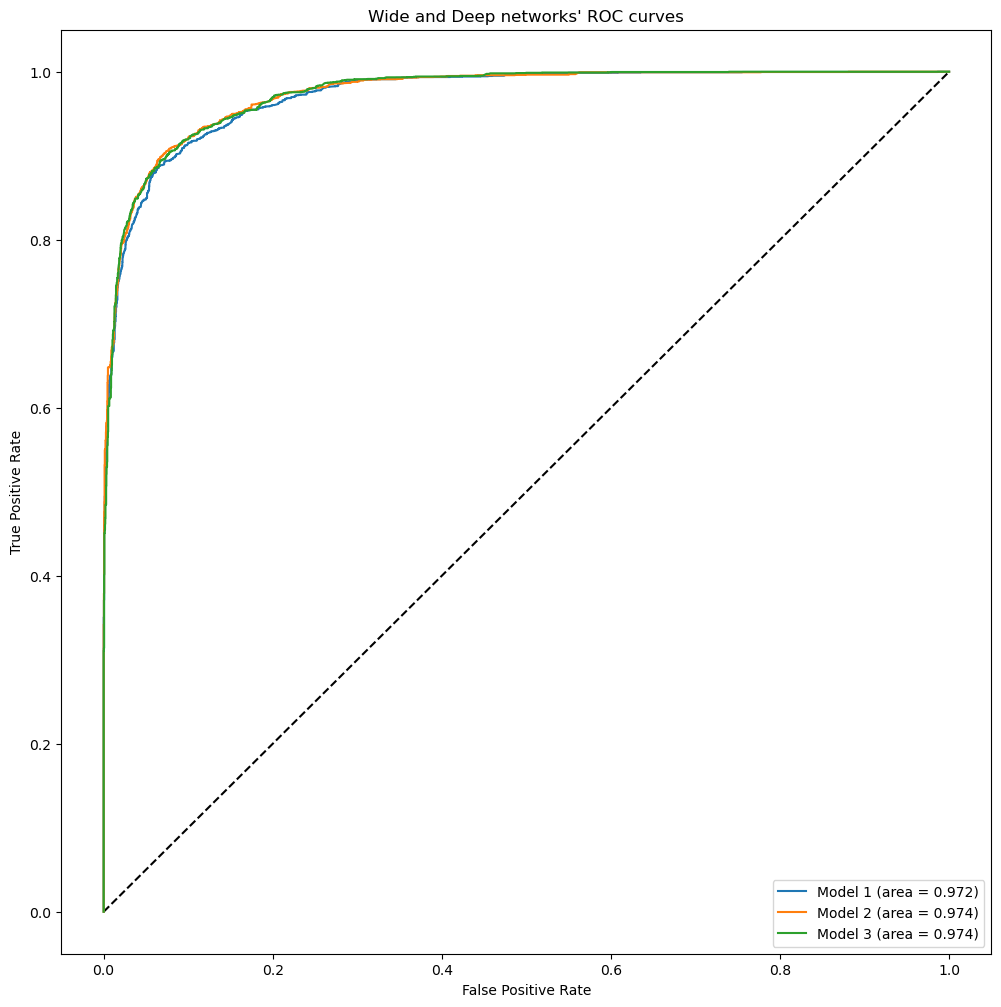

In [42]:
plt.figure(figsize=(12,12))

#plot halfway line
plt.plot([0,1], [0,1], 'k--')

plt.plot(fpr_1, tpr_1, label='Model 1 (area = {:.3f})'.format(auc_1))
plt.plot(fpr_2, tpr_2, label='Model 2 (area = {:.3f})'.format(auc_2))
plt.plot(fpr_3, tpr_3, label='Model 3 (area = {:.3f})'.format(auc_3))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Wide and Deep networks\' ROC curves')
plt.legend(loc='best')
plt.show()

We compare our wide and deep network model using the receiver operating characteristic and area under the curve values. The ROC curve shows the performance of a classification model at all classification thresholds based on true positive and false positive rates at different classification thresholds.

From the plot above, we can see the Model 2 got the best performance, which area slightlu larger than Model 1 and 3.

## 2.2 Changing the number of layers in the deep branch of the network

We choose the same way as model 2 choosing crossed columns:['mileage_evalue','model'], ['mileage_evalue','fuelType']. And apply different number of layers: 3 layers, 5 layers and 7 layers.

Since we apply 80/20 split on the dataset at the beginning, we keep this split rather than using cross validation. For evaluation metric, we choose f1 score as selected at the beginning.

In [43]:
# choose these as a class
cross_columns = [['mileage_evalue','model'],
                 ['mileage_evalue','fuelType']
                ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    
    cross_col_name = '_'.join(cols_list)
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['mileage_evalue_model', 'mileage_evalue_fuelType']

### 2.2.1 Three Layers

In [44]:
# get crossed columns
X_train_crossed = X_train[cross_col_df_names].to_numpy()
X_test_crossed = X_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = X_train[categorical_headers_ints].to_numpy() 
X_test_cat = X_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()

# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model_4 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)



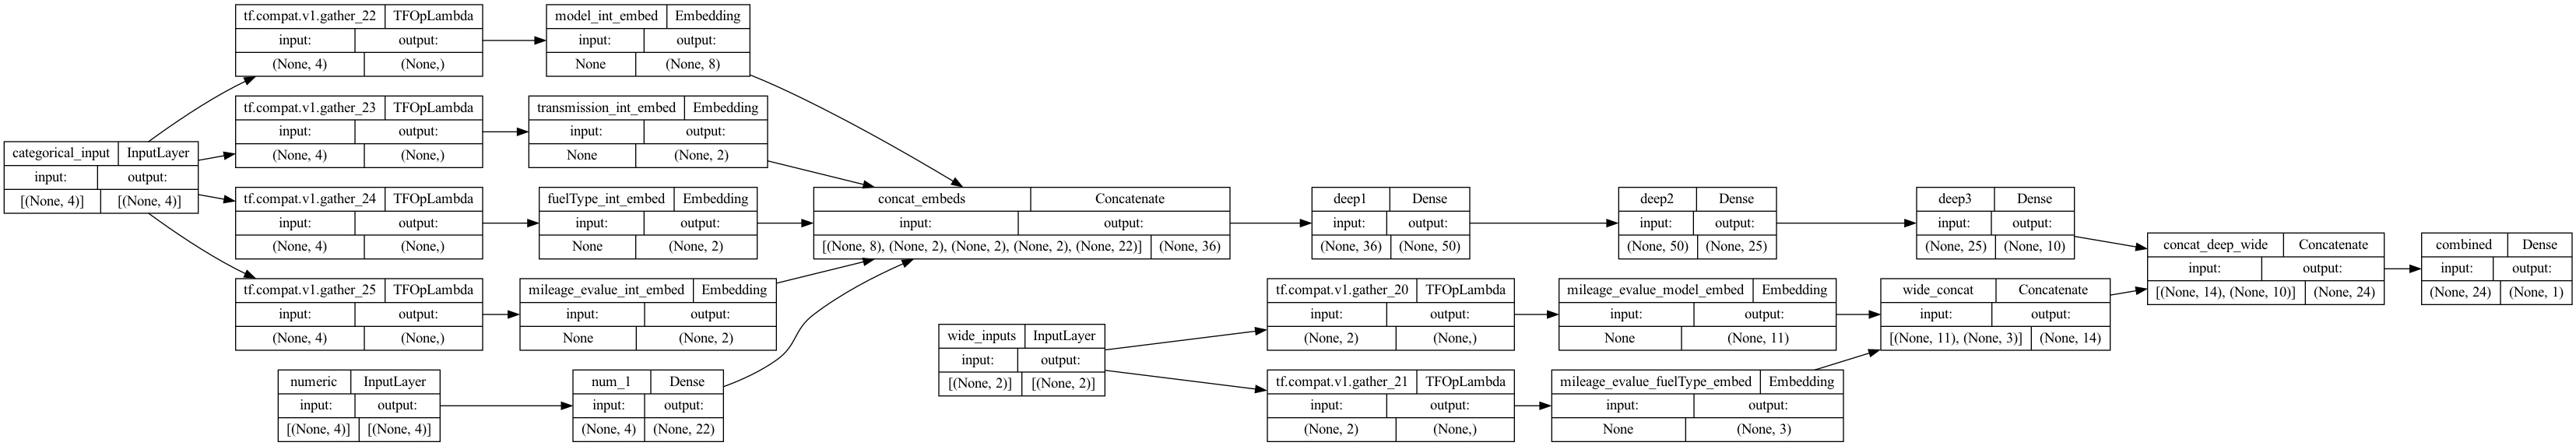

In [45]:
plot_model(
    model_4, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [46]:
%%time

model_4.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[F1])

history = model_4.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=150, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/150
865/865 [==============================] - 1s 1ms/step - loss: 0.2260 - F1: 0.3355 - val_loss: 0.2117 - val_F1: 0.6467
Epoch 2/150
865/865 [==============================] - 1s 841us/step - loss: 0.1995 - F1: 0.7300 - val_loss: 0.1857 - val_F1: 0.7751
Epoch 3/150
865/865 [==============================] - 1s 853us/step - loss: 0.1753 - F1: 0.7882 - val_loss: 0.1627 - val_F1: 0.8063
Epoch 4/150
865/865 [==============================] - 1s 850us/step - loss: 0.1536 - F1: 0.8200 - val_loss: 0.1423 - val_F1: 0.8374
Epoch 5/150
865/865 [==============================] - 1s 853us/step - loss: 0.1351 - F1: 0.8399 - val_loss: 0.1256 - val_F1: 0.8468
Epoch 6/150
865/865 [==============================] - 1s 833us/step - loss: 0.1205 - F1: 0.8477 - val_loss: 0.1128 - val_F1: 0.8538
Epoch 7/150
865/865 [==============================] - 1s 847us/step - loss: 0.1095 - F1: 0.8557 - val_loss: 0.1037 - val_F1: 0.8578
Epoch 8/150
865/865 [==============================] - 1s 844us/step - 

865/865 [==============================] - 1s 811us/step - loss: 0.0626 - F1: 0.9040 - val_loss: 0.0591 - val_F1: 0.9086
Epoch 124/150
865/865 [==============================] - 1s 811us/step - loss: 0.0626 - F1: 0.9029 - val_loss: 0.0591 - val_F1: 0.9086
Epoch 125/150
865/865 [==============================] - 1s 795us/step - loss: 0.0626 - F1: 0.9039 - val_loss: 0.0591 - val_F1: 0.9086
Epoch 126/150
865/865 [==============================] - 1s 805us/step - loss: 0.0625 - F1: 0.9042 - val_loss: 0.0590 - val_F1: 0.9086
Epoch 127/150
865/865 [==============================] - 1s 815us/step - loss: 0.0625 - F1: 0.9029 - val_loss: 0.0590 - val_F1: 0.9086
Epoch 128/150
865/865 [==============================] - 1s 812us/step - loss: 0.0625 - F1: 0.9035 - val_loss: 0.0590 - val_F1: 0.9086
Epoch 129/150
865/865 [==============================] - 1s 852us/step - loss: 0.0624 - F1: 0.9042 - val_loss: 0.0589 - val_F1: 0.9087
Epoch 130/150
865/865 [==============================] - 1s 880us/ste

In [47]:
yhat_3_layers = np.round(model_4.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat_3_layers))
print(mt.classification_report(y_test,yhat_3_layers))

217/217 [==============================] - 0s 489us/step
[[3500  263]
 [ 290 2861]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3763
           1       0.92      0.91      0.91      3151

    accuracy                           0.92      6914
   macro avg       0.92      0.92      0.92      6914
weighted avg       0.92      0.92      0.92      6914



Text(0.5, 0, 'epochs')

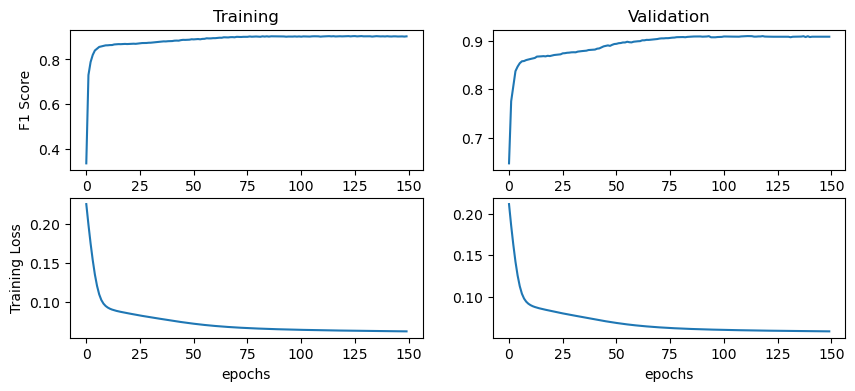

In [48]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['F1'])

plt.ylabel('F1 Score')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_F1'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [49]:
y_pred_4 = model_4.predict([X_test_crossed,X_test_cat,X_test_num]).ravel()
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, y_pred_4)
auc_4 = auc(fpr_4, tpr_4)

217/217 [==============================] - 0s 514us/step


### 2.2.2 Five Layers

In [50]:
# get crossed columns
X_train_crossed = X_train[cross_col_df_names].to_numpy()
X_test_crossed = X_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = X_train[categorical_headers_ints].to_numpy() 
X_test_cat = X_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()

# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=50, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep4')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep5')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model_5 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)



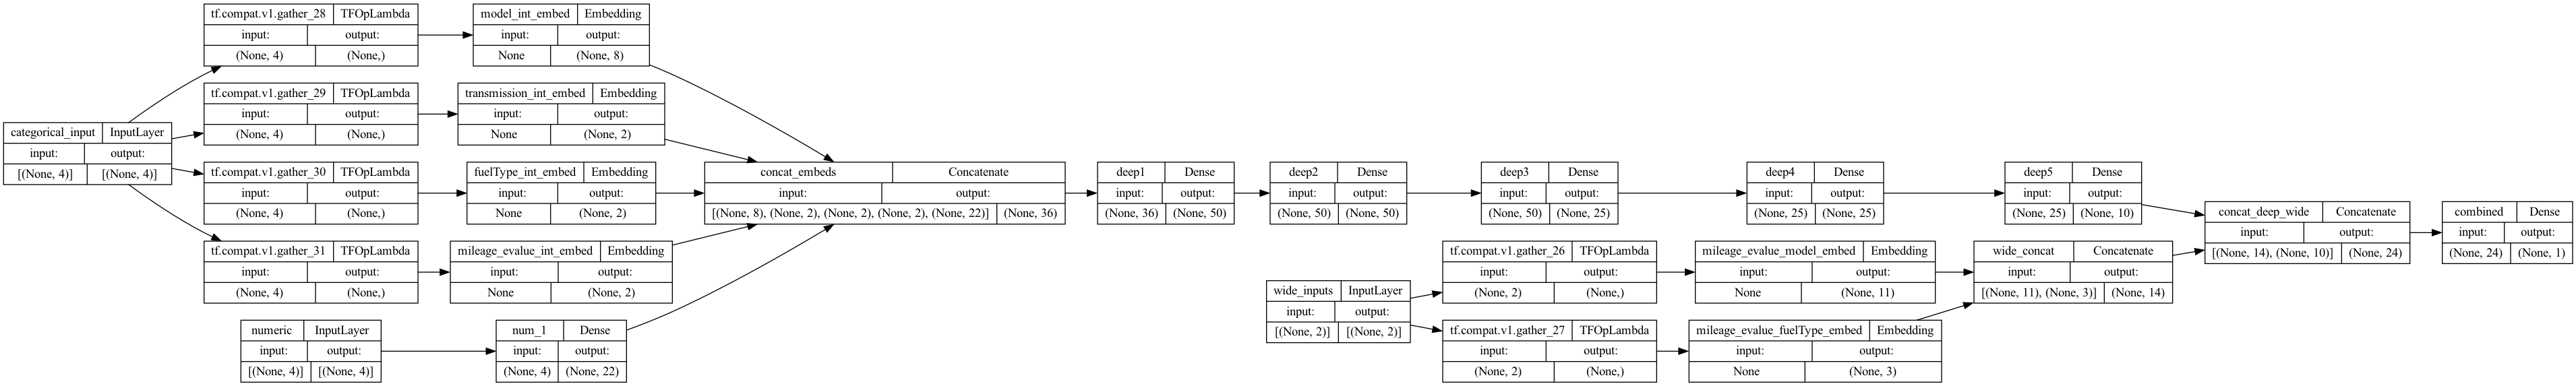

In [51]:
plot_model(
    model_5, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [52]:
%%time

model_5.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[F1])

history = model_5.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=150, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/150
865/865 [==============================] - 1s 1ms/step - loss: 0.2392 - F1: 0.1557 - val_loss: 0.2293 - val_F1: 0.3319
Epoch 2/150
865/865 [==============================] - 1s 934us/step - loss: 0.2188 - F1: 0.5041 - val_loss: 0.2044 - val_F1: 0.6402
Epoch 3/150
865/865 [==============================] - 1s 944us/step - loss: 0.1896 - F1: 0.7359 - val_loss: 0.1729 - val_F1: 0.8146
Epoch 4/150
865/865 [==============================] - 1s 959us/step - loss: 0.1616 - F1: 0.8297 - val_loss: 0.1486 - val_F1: 0.8423
Epoch 5/150
865/865 [==============================] - 1s 935us/step - loss: 0.1405 - F1: 0.8502 - val_loss: 0.1301 - val_F1: 0.8555
Epoch 6/150
865/865 [==============================] - 1s 921us/step - loss: 0.1239 - F1: 0.8585 - val_loss: 0.1152 - val_F1: 0.8601
Epoch 7/150
865/865 [==============================] - 1s 934us/step - loss: 0.1108 - F1: 0.8632 - val_loss: 0.1040 - val_F1: 0.8653
Epoch 8/150
865/865 [==============================] - 1s 932us/step - 

865/865 [==============================] - 1s 926us/step - loss: 0.0622 - F1: 0.9023 - val_loss: 0.0585 - val_F1: 0.9091
Epoch 124/150
865/865 [==============================] - 1s 920us/step - loss: 0.0621 - F1: 0.9025 - val_loss: 0.0584 - val_F1: 0.9093
Epoch 125/150
865/865 [==============================] - 1s 903us/step - loss: 0.0621 - F1: 0.9018 - val_loss: 0.0584 - val_F1: 0.9094
Epoch 126/150
865/865 [==============================] - 1s 923us/step - loss: 0.0620 - F1: 0.9024 - val_loss: 0.0584 - val_F1: 0.9094
Epoch 127/150
865/865 [==============================] - 1s 924us/step - loss: 0.0620 - F1: 0.9024 - val_loss: 0.0583 - val_F1: 0.9094
Epoch 128/150
865/865 [==============================] - 1s 933us/step - loss: 0.0620 - F1: 0.9023 - val_loss: 0.0583 - val_F1: 0.9094
Epoch 129/150
865/865 [==============================] - 1s 923us/step - loss: 0.0619 - F1: 0.9029 - val_loss: 0.0583 - val_F1: 0.9091
Epoch 130/150
865/865 [==============================] - 1s 906us/ste

In [53]:
yhat_5_layers = np.round(model_5.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat_5_layers))
print(mt.classification_report(y_test,yhat_5_layers))

217/217 [==============================] - 0s 515us/step
[[3516  247]
 [ 294 2857]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3763
           1       0.92      0.91      0.91      3151

    accuracy                           0.92      6914
   macro avg       0.92      0.92      0.92      6914
weighted avg       0.92      0.92      0.92      6914



Text(0.5, 0, 'epochs')

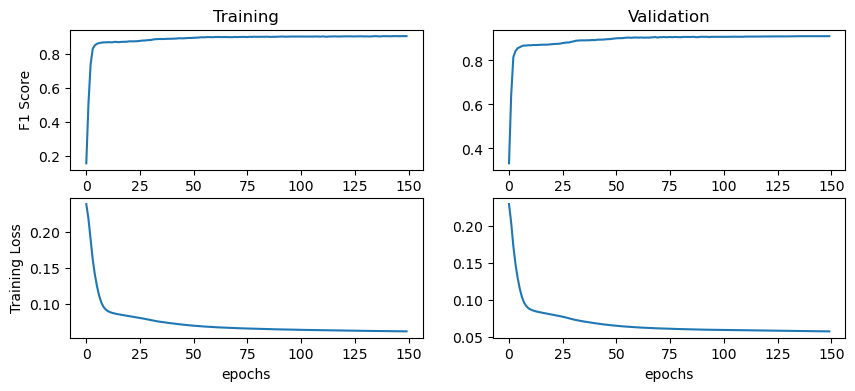

In [54]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['F1'])

plt.ylabel('F1 Score')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_F1'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [55]:
y_pred_5 = model_5.predict([X_test_crossed,X_test_cat,X_test_num]).ravel()
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test, y_pred_5)
auc_5 = auc(fpr_5, tpr_5)

print(auc_5)

217/217 [==============================] - 0s 491us/step
0.9782541647856035


### 2.2.3 Seven Layers

In [56]:
# get crossed columns
X_train_crossed = X_train[cross_col_df_names].to_numpy()
X_test_crossed = X_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = X_train[categorical_headers_ints].to_numpy() 
X_test_cat = X_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()

# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=100, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=50, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=50, activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep4')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep5')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep6')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep7')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model_6 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)



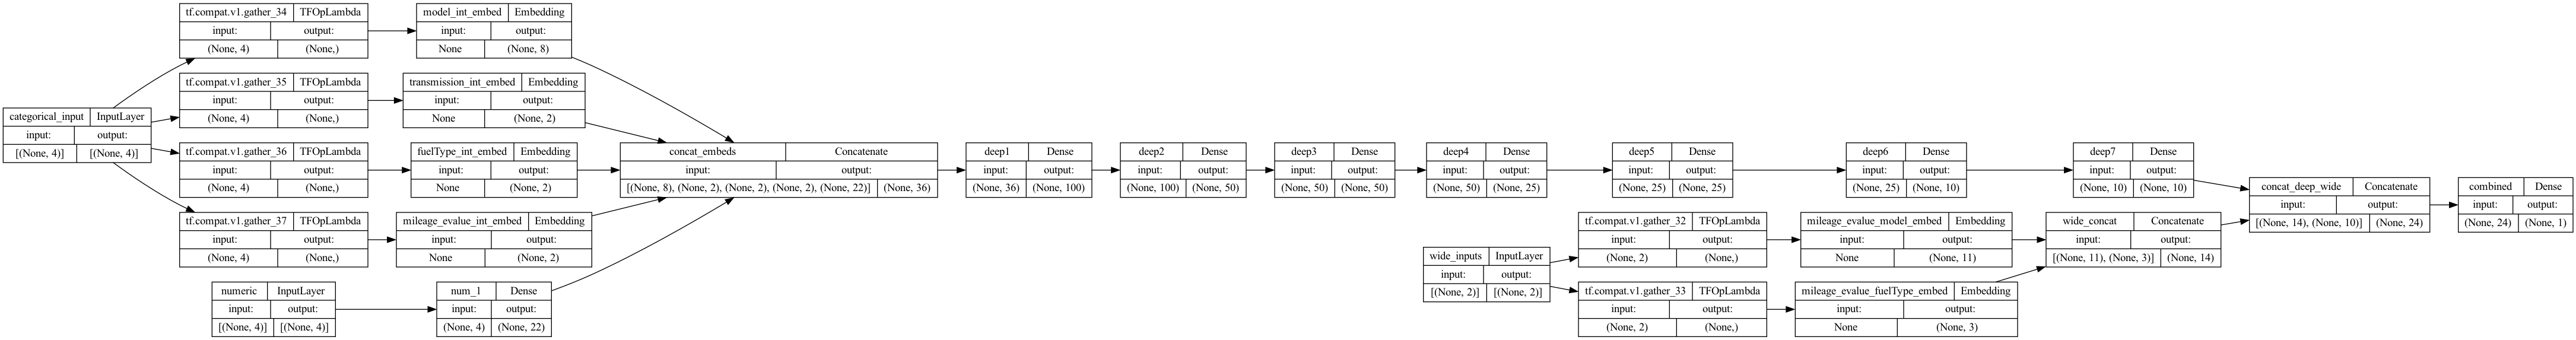

In [57]:
plot_model(
    model_6, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [58]:
%%time

model_6.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[F1])

history = model_6.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=150, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/150
865/865 [==============================] - 1s 1ms/step - loss: 0.2462 - F1: 0.5823 - val_loss: 0.2433 - val_F1: 0.6475
Epoch 2/150
865/865 [==============================] - 1s 1ms/step - loss: 0.2395 - F1: 0.7183 - val_loss: 0.2347 - val_F1: 0.7736
Epoch 3/150
865/865 [==============================] - 1s 1ms/step - loss: 0.2269 - F1: 0.8225 - val_loss: 0.2164 - val_F1: 0.8534
Epoch 4/150
865/865 [==============================] - 1s 1ms/step - loss: 0.2028 - F1: 0.8595 - val_loss: 0.1884 - val_F1: 0.8690
Epoch 5/150
865/865 [==============================] - 1s 1ms/step - loss: 0.1778 - F1: 0.8617 - val_loss: 0.1683 - val_F1: 0.8665
Epoch 6/150
865/865 [==============================] - 1s 1ms/step - loss: 0.1627 - F1: 0.8627 - val_loss: 0.1565 - val_F1: 0.8676
Epoch 7/150
865/865 [==============================] - 1s 1ms/step - loss: 0.1529 - F1: 0.8631 - val_loss: 0.1476 - val_F1: 0.8675
Epoch 8/150
865/865 [==============================] - 1s 1ms/step - loss: 0.1447 -

Epoch 63/150
865/865 [==============================] - 1s 991us/step - loss: 0.0622 - F1: 0.9028 - val_loss: 0.0584 - val_F1: 0.9076
Epoch 64/150
865/865 [==============================] - 1s 990us/step - loss: 0.0621 - F1: 0.9016 - val_loss: 0.0584 - val_F1: 0.9076
Epoch 65/150
865/865 [==============================] - 1s 981us/step - loss: 0.0620 - F1: 0.9024 - val_loss: 0.0583 - val_F1: 0.9075
Epoch 66/150
865/865 [==============================] - 1s 986us/step - loss: 0.0619 - F1: 0.9033 - val_loss: 0.0583 - val_F1: 0.9082
Epoch 67/150
865/865 [==============================] - 1s 1ms/step - loss: 0.0618 - F1: 0.9038 - val_loss: 0.0581 - val_F1: 0.9079
Epoch 68/150
865/865 [==============================] - 1s 991us/step - loss: 0.0618 - F1: 0.9042 - val_loss: 0.0581 - val_F1: 0.9090
Epoch 69/150
865/865 [==============================] - 1s 979us/step - loss: 0.0617 - F1: 0.9034 - val_loss: 0.0580 - val_F1: 0.9083
Epoch 70/150
865/865 [==============================] - 1s 992us

In [59]:
yhat_7_layers = np.round(model_6.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat_7_layers))
print(mt.classification_report(y_test,yhat_7_layers))

217/217 [==============================] - 0s 545us/step
[[3552  211]
 [ 299 2852]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3763
           1       0.93      0.91      0.92      3151

    accuracy                           0.93      6914
   macro avg       0.93      0.92      0.93      6914
weighted avg       0.93      0.93      0.93      6914



Text(0.5, 0, 'epochs')

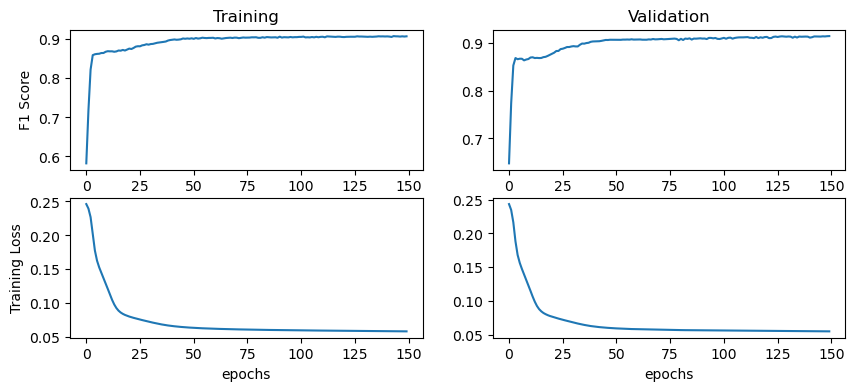

In [60]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['F1'])

plt.ylabel('F1 Score')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_F1'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [61]:
y_pred_6 = model_6.predict([X_test_crossed,X_test_cat,X_test_num]).ravel()
fpr_6, tpr_6, thresholds_6 = roc_curve(y_test, y_pred_6)
auc_6 = auc(fpr_6, tpr_6)

print(auc_6)

217/217 [==============================] - 0s 532us/step
0.979292520088827


### 2.2.4 Compare performance of different number of layers

In [62]:
def create_contingency_McNemar(y_test, model1_pred, model2_pred):
    
    correct1_correct2 = 0  # model 1 predict correctly, model 2 also predict correctly
    correct1_wrong2 = 0 # model 1 predict correctly, model 2 predict wrong
    wrong1_correct2 = 0
    wrong1_wrong2 = 0
    table = np.zeros([2, 2],dtype = int)
    
    for i in range(len(y_test)):
        if model1_pred[i] == y_test[i] and model2_pred[i] == y_test[i]:
            correct1_correct2 +=1
        elif model1_pred[i] == y_test[i] and model2_pred[i] != y_test[i]:
            correct1_wrong2 +=1
        elif model1_pred[i] != y_test[i] and model2_pred[i] == y_test[i]:
            wrong1_correct2 +=1
        else:
            wrong1_wrong2 +=1
    table[0][0] = int(correct1_correct2)
    table[0][1] = int(correct1_wrong2)
    table[1][0] = int(wrong1_correct2)
    table[1][1] = int(wrong1_wrong2)
    
    return table

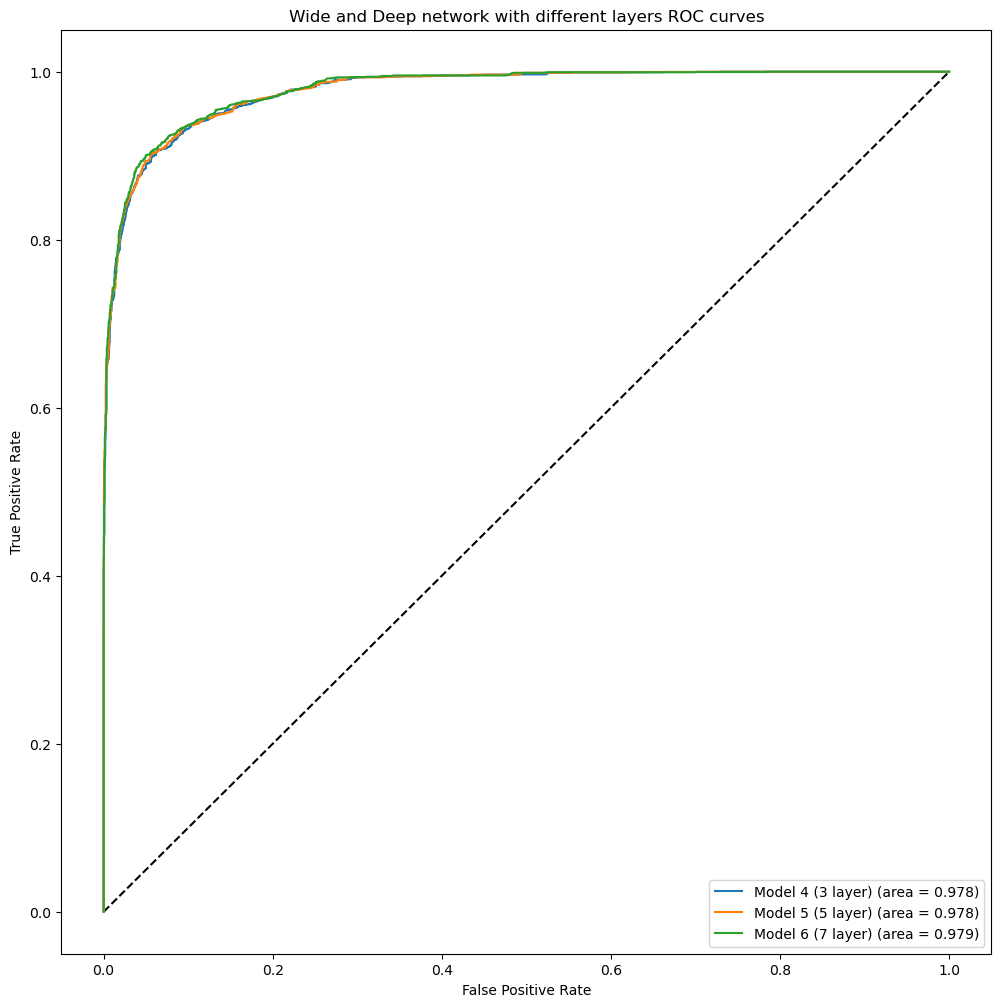

In [64]:
plt.figure(figsize=(12,12))

#plot halfway line
plt.plot([0,1], [0,1], 'k--')

plt.plot(fpr_4, tpr_4, label='Model 4 (3 layer) (area = {:.3f})'.format(auc_4))
plt.plot(fpr_5, tpr_5, label='Model 5 (5 layer) (area = {:.3f})'.format(auc_5))
plt.plot(fpr_6, tpr_6, label='Model 6 (7 layer) (area = {:.3f})'.format(auc_6))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Wide and Deep network with different layers ROC curves')
plt.legend(loc='best')
plt.show()

In [63]:
from statsmodels.stats.contingency_tables import mcnemar

temp_table = create_contingency_McNemar(y_test.to_numpy(), yhat_3_layers, yhat_5_layers)
result = mcnemar(temp_table, exact=True)

print('3 layers & 5 layers')
print('contingency_tables:')
print(temp_table)
print('caculate the McNemar')
print(result)
if result.pvalue < 0.05:
    print('Reject the Null hypothesis: Different proportions of errors.')
else:
    print('Take the Null hypothesis: Same proportions of errors.')
print('---------------------------------------------------')


temp_table = create_contingency_McNemar(y_test.to_numpy(), yhat_3_layers, yhat_7_layers)
result = mcnemar(temp_table, exact=True)

print('3 layers & 7 layers')
print('contingency_tables:')
print(temp_table)
print('caculate the McNemar')
print(result)
if result.pvalue < 0.05:
    print('Reject the Null hypothesis: Different proportions of errors.')
else:
    print('Take the Null hypothesis: Same proportions of errors.')
print('---------------------------------------------------')


temp_table = create_contingency_McNemar(y_test.to_numpy(), yhat_5_layers, yhat_7_layers)
result = mcnemar(temp_table, exact=True)

print('5 layers & 7 layers')
print('contingency_tables:')
print(temp_table)
print('caculate the McNemar')
print(result)
if result.pvalue < 0.05:
    print('Reject the Null hypothesis: Different proportions of errors.')
else:
    print('Take the Null hypothesis: Same proportions of errors.')
print('---------------------------------------------------')

3 layers & 5 layers
contingency_tables:
[[6325   36]
 [  48  505]]
caculate the McNemar
pvalue      0.2298644069691203
statistic   36.0
Take the Null hypothesis: Same proportions of errors.
---------------------------------------------------
3 layers & 7 layers
contingency_tables:
[[6324   37]
 [  80  473]]
caculate the McNemar
pvalue      8.717436729426461e-05
statistic   37.0
Reject the Null hypothesis: Different proportions of errors.
---------------------------------------------------
5 layers & 7 layers
contingency_tables:
[[6336   37]
 [  68  473]]
caculate the McNemar
pvalue      0.0032209898687985275
statistic   37.0
Reject the Null hypothesis: Different proportions of errors.
---------------------------------------------------


Based on the result of McNemar test, we can say that the performance of 7 layers is significantly different from 3 layers and 5 layers since it has different proportions of errors with others. 

3 layers and 5 layers are not significantly different in performance.

3 layers and 7 layers are significantly different in performance, and f1 score of 7 layers is higher than 3 layers. We can say that 7 layers has better performance than 3 layers.

5 layers and 7 layers are significantly different in performance, and f1 socre of 7 layers is higher than 5 layers. We can say that 7 layers has better performance than 5 layers.

Therefore, we will set number of layers to 7 as our best model.

## 2.3 Compare the performance of best wide and deep network to a network without the wide branch

From part 2.2, we can see that model 2 with seven layers performs best. In this part, we will compare it with a network without the wide branch.

In [65]:
# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):

    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_cat, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT

input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=10, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=30,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep2')(deep_branch)

    
# merge the deep and wide branch

final_branch = Dense(units=1,activation='sigmoid',
                     name='output')(deep_branch)

model_7 = Model(inputs=[input_cat,input_num], 
              outputs=final_branch)

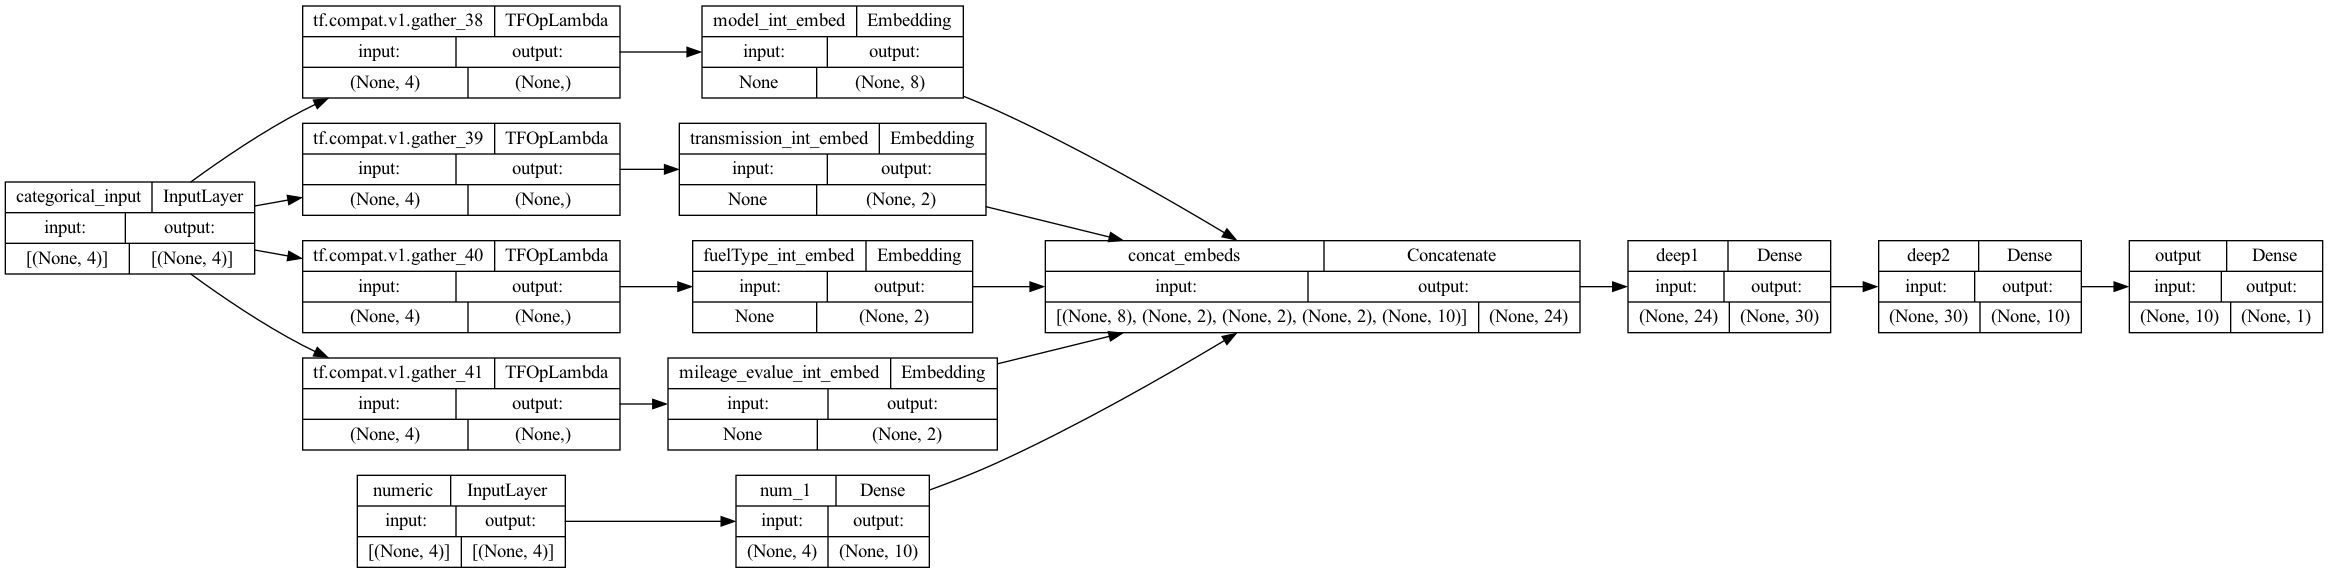

In [66]:
plot_model(
    model_7, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [67]:
%%time

model_7.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[F1])

history = model_7.fit([X_train_cat,X_train_num],
                    y_train, 
                    epochs=150, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_cat,X_test_num],y_test))

Epoch 1/150
865/865 [==============================] - 1s 901us/step - loss: 0.2148 - F1: 0.7349 - val_loss: 0.1970 - val_F1: 0.8186
Epoch 2/150
865/865 [==============================] - 1s 771us/step - loss: 0.1841 - F1: 0.8203 - val_loss: 0.1700 - val_F1: 0.8297
Epoch 3/150
865/865 [==============================] - 1s 745us/step - loss: 0.1600 - F1: 0.8280 - val_loss: 0.1485 - val_F1: 0.8313
Epoch 4/150
865/865 [==============================] - 1s 748us/step - loss: 0.1411 - F1: 0.8313 - val_loss: 0.1319 - val_F1: 0.8368
Epoch 5/150
865/865 [==============================] - 1s 753us/step - loss: 0.1267 - F1: 0.8369 - val_loss: 0.1196 - val_F1: 0.8471
Epoch 6/150
865/865 [==============================] - 1s 737us/step - loss: 0.1162 - F1: 0.8468 - val_loss: 0.1107 - val_F1: 0.8550
Epoch 7/150
865/865 [==============================] - 1s 744us/step - loss: 0.1086 - F1: 0.8512 - val_loss: 0.1041 - val_F1: 0.8584
Epoch 8/150
865/865 [==============================] - 1s 741us/step 

865/865 [==============================] - 1s 722us/step - loss: 0.0650 - F1: 0.9006 - val_loss: 0.0614 - val_F1: 0.9066
Epoch 124/150
865/865 [==============================] - 1s 747us/step - loss: 0.0650 - F1: 0.8998 - val_loss: 0.0614 - val_F1: 0.9065
Epoch 125/150
865/865 [==============================] - 1s 800us/step - loss: 0.0650 - F1: 0.9006 - val_loss: 0.0613 - val_F1: 0.9067
Epoch 126/150
865/865 [==============================] - 1s 725us/step - loss: 0.0649 - F1: 0.9009 - val_loss: 0.0613 - val_F1: 0.9067
Epoch 127/150
865/865 [==============================] - 1s 733us/step - loss: 0.0649 - F1: 0.9004 - val_loss: 0.0613 - val_F1: 0.9067
Epoch 128/150
865/865 [==============================] - 1s 727us/step - loss: 0.0648 - F1: 0.9011 - val_loss: 0.0612 - val_F1: 0.9067
Epoch 129/150
865/865 [==============================] - 1s 729us/step - loss: 0.0648 - F1: 0.9020 - val_loss: 0.0612 - val_F1: 0.9067
Epoch 130/150
865/865 [==============================] - 1s 738us/ste

In [68]:
yhat = np.round(model_7.predict([X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

217/217 [==============================] - 0s 452us/step
[[3511  252]
 [ 304 2847]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3763
           1       0.92      0.90      0.91      3151

    accuracy                           0.92      6914
   macro avg       0.92      0.92      0.92      6914
weighted avg       0.92      0.92      0.92      6914



Text(0.5, 0, 'epochs')

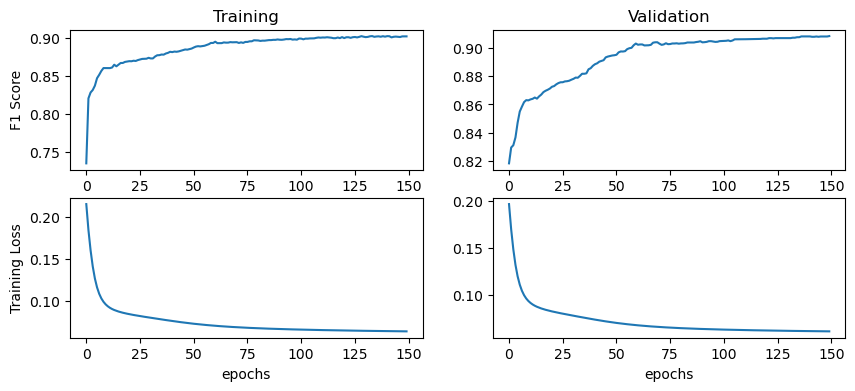

In [69]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['F1'])

plt.ylabel('F1 Score')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_F1'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [70]:
y_pred_7 = model_7.predict([X_test_cat,X_test_num]).ravel()
fpr_7, tpr_7, thresholds_7 = roc_curve(y_test, y_pred_7)
auc_7 = auc(fpr_7, tpr_7)

217/217 [==============================] - 0s 427us/step


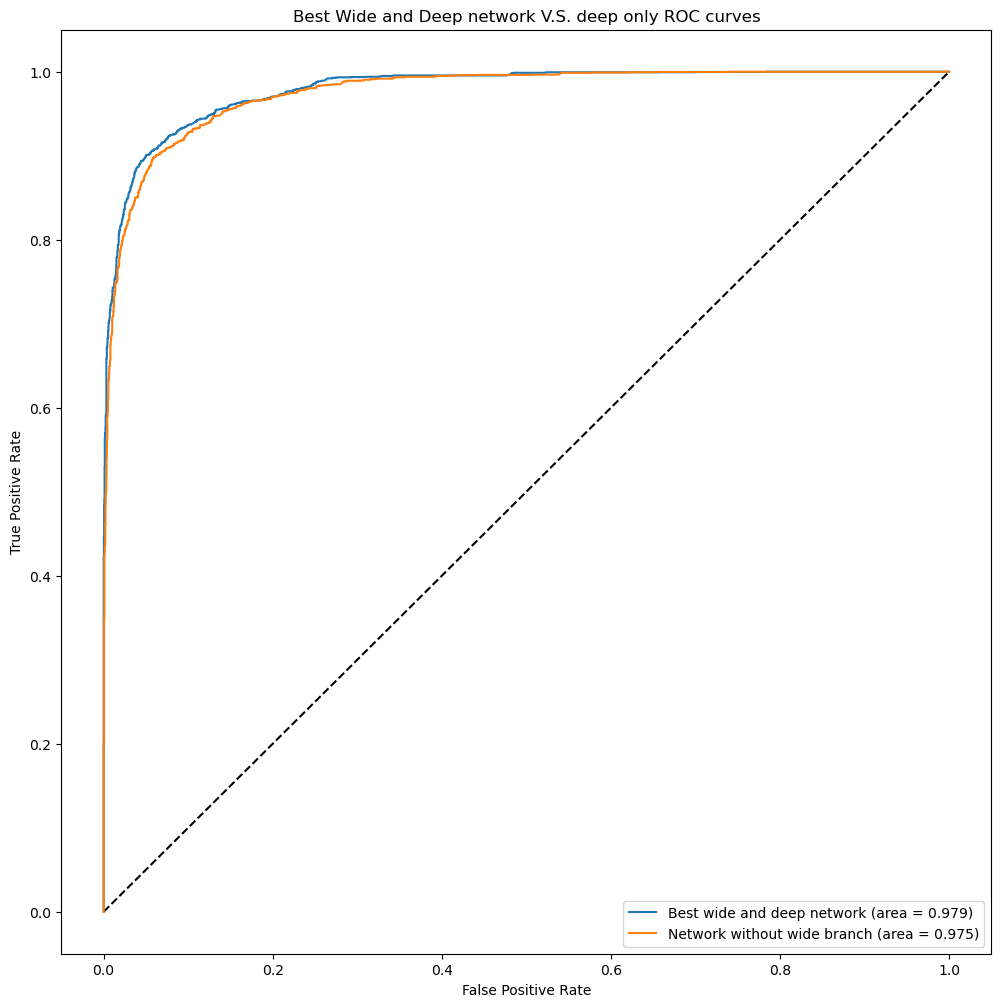

In [71]:
plt.figure(figsize=(12,12))

#plot halfway line
plt.plot([0,1], [0,1], 'k--')

plt.plot(fpr_6, tpr_6, label='Best wide and deep network (area = {:.3f})'.format(auc_6))
plt.plot(fpr_7, tpr_7, label='Network without wide branch (area = {:.3f})'.format(auc_7))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best Wide and Deep network V.S. deep only ROC curves')
plt.legend(loc='best')
plt.show()

We compare our wide and deep network model using the receiver operating characteristic and area under the curve values. The ROC curve shows the performance of a classification model at all classification thresholds based on true positive and false positive rates at different classification thresholds.

From the plot above, since area of best model is larger, we can say that our best model performs better than network without wide branch.

# 4. Exceptional Work

Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.

In [72]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [73]:
# choose these as a class
cross_columns = [
#                  ['model','transmission'],
#                  ['model','fuelType'],
#                  ['transmission','fuelType'],
                 ['mileage_evalue','model'],
                 ['mileage_evalue','fuelType']
                ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:

    cross_col_name = '_'.join(cols_list)
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['mileage_evalue_model', 'mileage_evalue_fuelType']

In [74]:
X_crossed = X[cross_col_df_names].to_numpy()
X_cat = X[categorical_headers_ints].to_numpy()
X_num = X[numeric_headers].to_numpy()

X_crossed_train = X_train[cross_col_df_names].to_numpy()
X_train_cat = X_train[categorical_headers_ints].to_numpy()
X_train_num = X_train[numeric_headers].to_numpy()

In [75]:
print('All layer in the model:')
weight_extracted = []
for layer in model_2.layers:
    print('\t',layer.name)
    weight_extracted.append(layer.get_weights()) 



All layer in the model:
	 categorical_input
	 tf.compat.v1.gather_9
	 tf.compat.v1.gather_10
	 tf.compat.v1.gather_11
	 tf.compat.v1.gather_12
	 numeric
	 model_int_embed
	 transmission_int_embed
	 fuelType_int_embed
	 mileage_evalue_int_embed
	 num_1
	 wide_inputs
	 concat_embeds
	 tf.compat.v1.gather_7
	 tf.compat.v1.gather_8
	 deep1
	 mileage_evalue_model_embed
	 mileage_evalue_fuelType_embed
	 deep2
	 wide_concat
	 deep3
	 concat_deep_wide
	 combined


## 4.1 Capture the embedding weights

865/865 [==============================] - 0s 355us/step


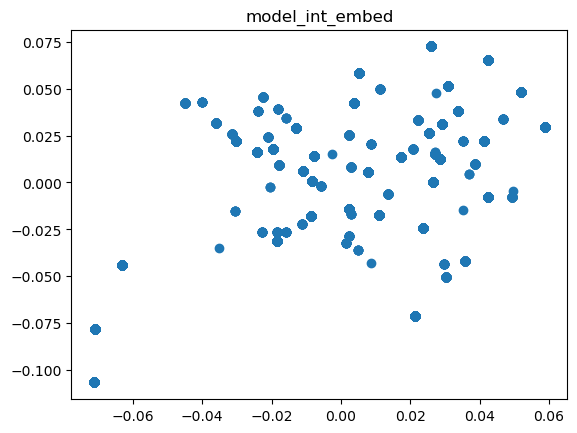

865/865 [==============================] - 0s 352us/step


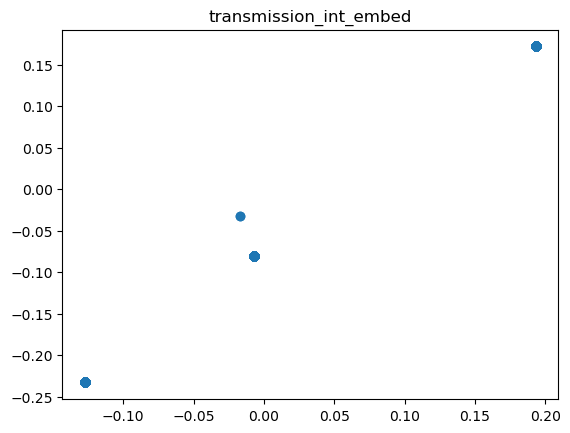

865/865 [==============================] - 0s 357us/step


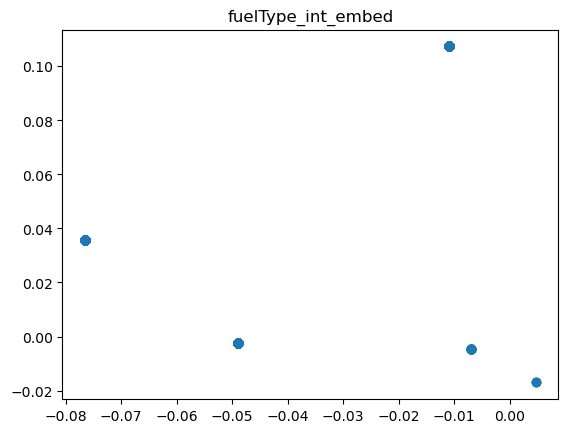

865/865 [==============================] - 0s 349us/step


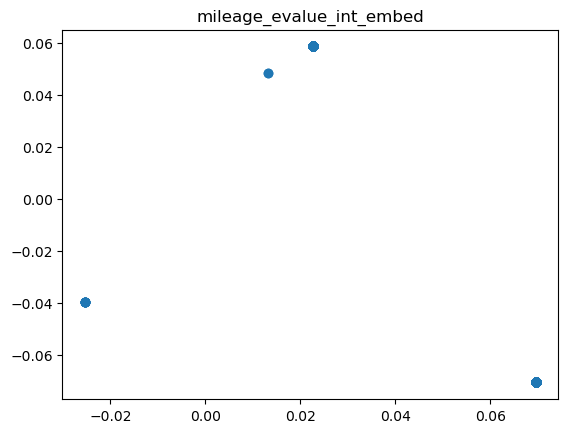

In [79]:
for temp in categorical_headers_ints:
    layer_name = f'{temp}_embed'
    every_layer_model = Model(inputs=model_2.input, outputs=model_2.get_layer(layer_name).output)
    output = every_layer_model.predict([X_crossed_train, X_train_cat, X_train_num])
    plt.title(layer_name)
    plt.scatter(output.T[0], output.T[1])
    plt.show()


We can see how each instance predict in the dataset throw the upper plots.
For further analyze, we will apply dimension reduction.

## 4.2 Dimension reduction
### 4.2.1 t-SNE

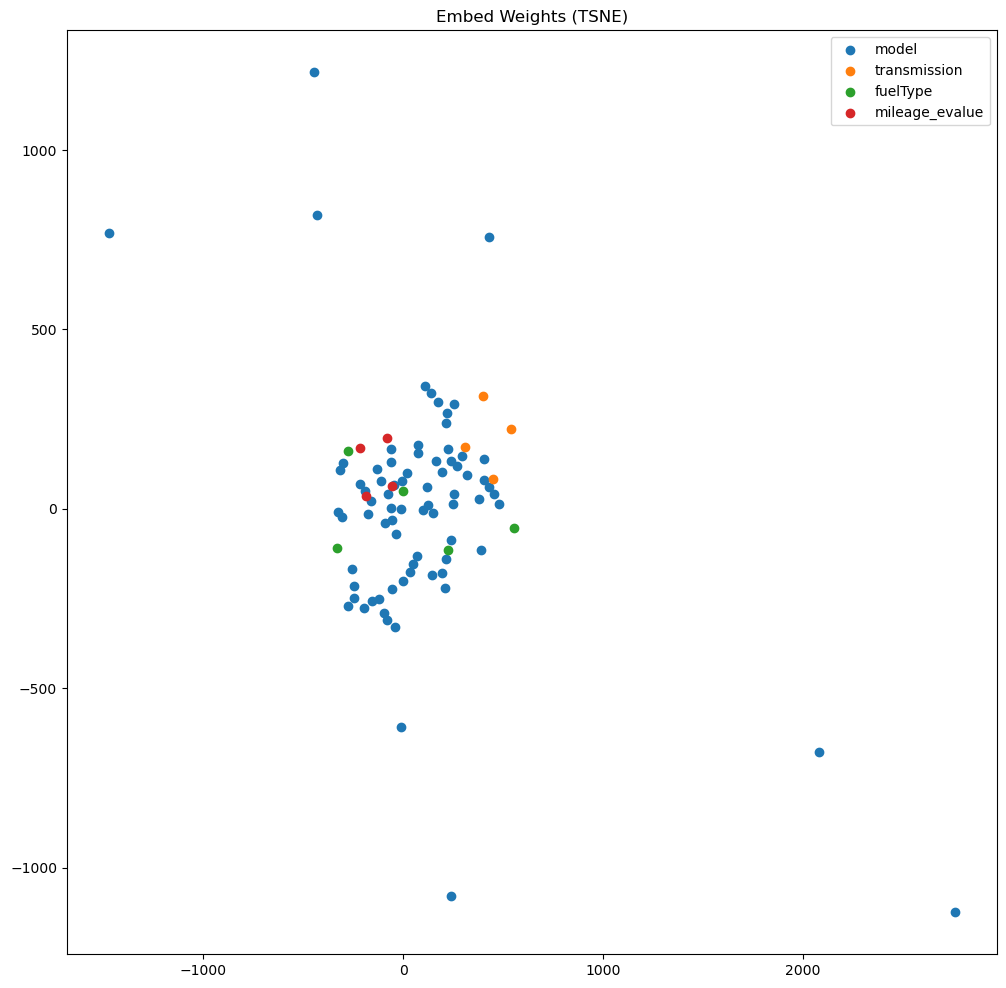

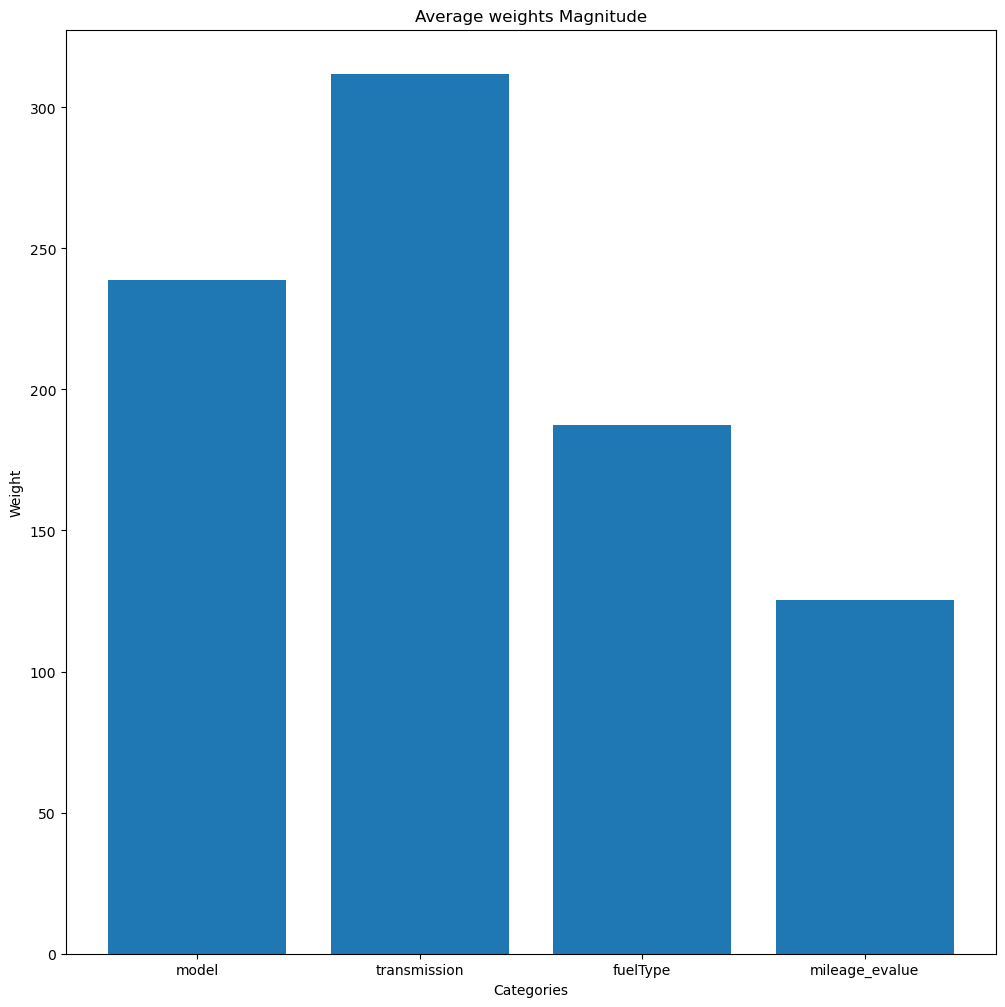

In [110]:
weight_extracted = []
for layer in model_2.layers:

    if 'int_embed' in layer.name:
        weight_extracted.append(layer.get_weights())
# print('==================')
temp_list = weight_extracted
weight_extracted = []
for w in temp_list:
    if len(w):
        weight_extracted.append(w[0])

t = TSNE(n_components=2, perplexity = 3, random_state = 1, verbose = 0)

tsneWeights = []
for w in weight_extracted:
    temp_tSNE_weight = t.fit_transform(w)
    tsneWeights.append(temp_tSNE_weight)

plt.figure(figsize=(12,12))
for idx, w in enumerate(tsneWeights):    
    plt.scatter(w[:,0], w[:,1], label = categorical_headers[idx])
plt.title('Embed Weights (TSNE)')
plt.legend(loc=1)
plt.show()

# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticks(range(len(tsneWeights)))
ax.set_xticklabels(categorical_headers)
average_weight = [np.mean(np.absolute(w)) for w in tsneWeights]
ax.bar(range(len(tsneWeights)), average_weight)
plt.xlabel("Categories")
plt.ylabel("Weight")
plt.title("Average weights Magnitude")
plt.show()

We use the TSNE method for dimension reduction, as shown in the figure there is a denser cluster at the middle, which means they are more correlated, while there are some outliers for model, which means they are less correlated than the connected values at the middle. The transmission and mileage_evalue seems have a dense group. Also we can see the transmission have the greatest magnitude. That means it have a higer influence when predicting model.

### 4.2.2 PCA

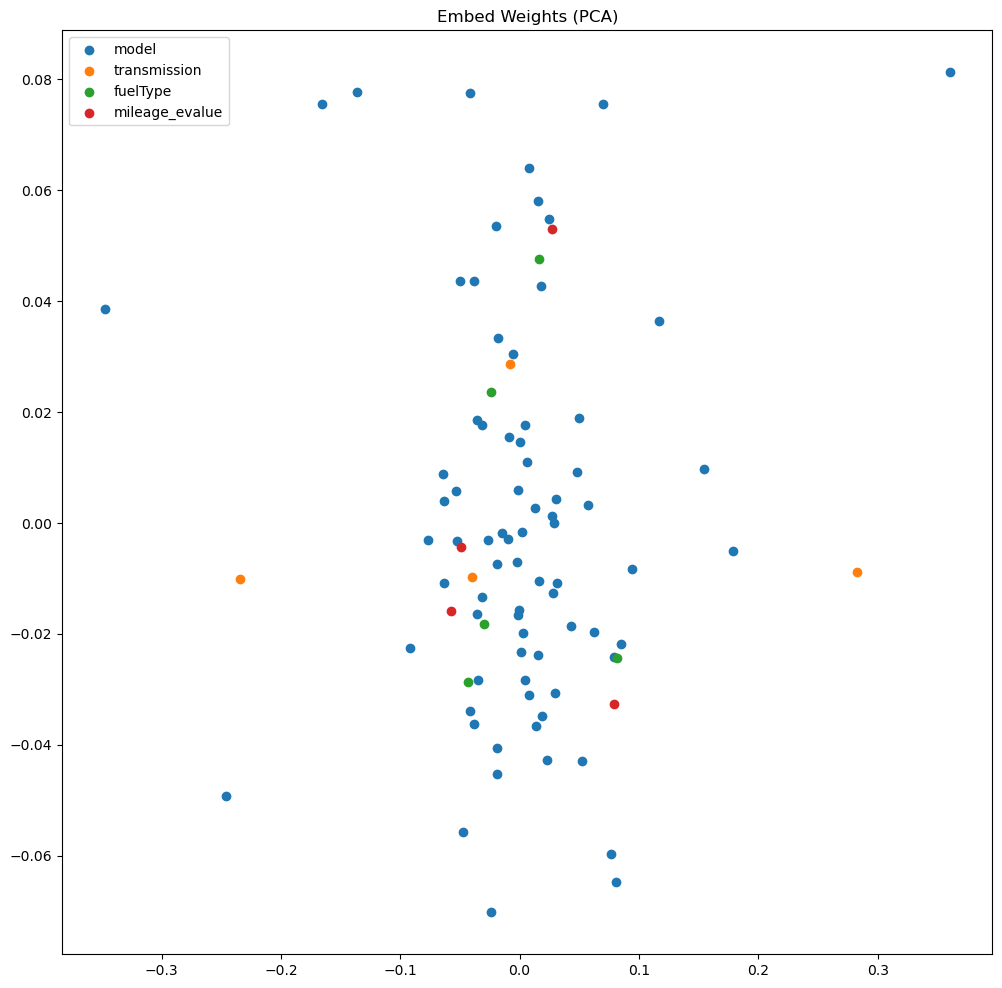

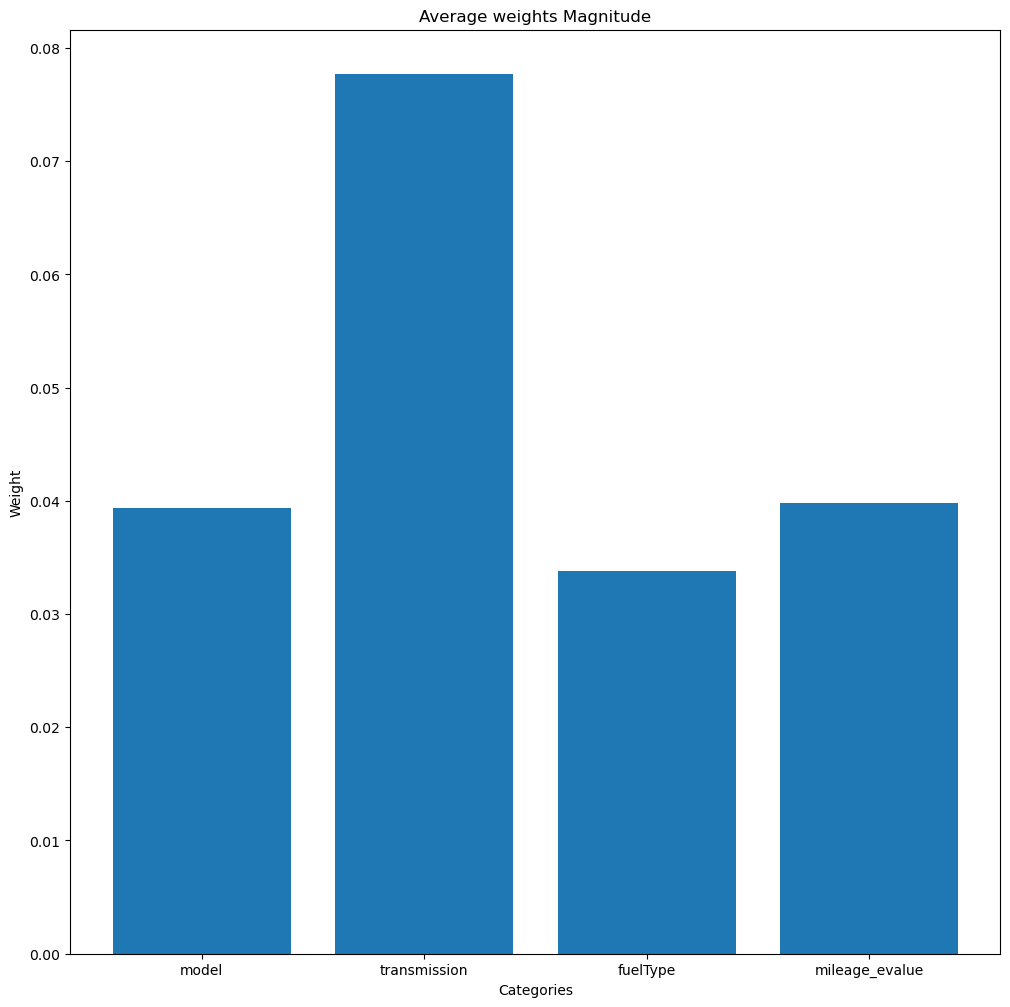

In [113]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='randomized')
pca_weights = []
for w in weight_extracted:
    pca_weight = pca.fit_transform(w)
    pca_weights.append(pca_weight)

plt.figure(figsize=(12,12))
for idx, w in enumerate(pca_weights):    
    plt.scatter(w[:,0], w[:,1], label = categorical_headers[idx])
plt.title('Embed Weights (PCA)')
plt.legend(loc=0)
plt.show()

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticks(range(len(pca_weights)))
ax.set_xticklabels(categorical_headers)
average_weight = [np.mean(np.absolute(pca_weight)) for pca_weight in pca_weights]
ax.bar(range(len(pca_weights)), average_weight)
plt.xlabel("Categories")
plt.ylabel("Weight")
plt.title("Average weights Magnitude")
plt.show()

The PCA scatter plot shows that transmission possesses obvious outlier divisions. That means the difference of transmission has a large influence on the results. It accounts for the major component of all factors.

### 4.2.3 t-SNE with PCA Initializations 
src: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

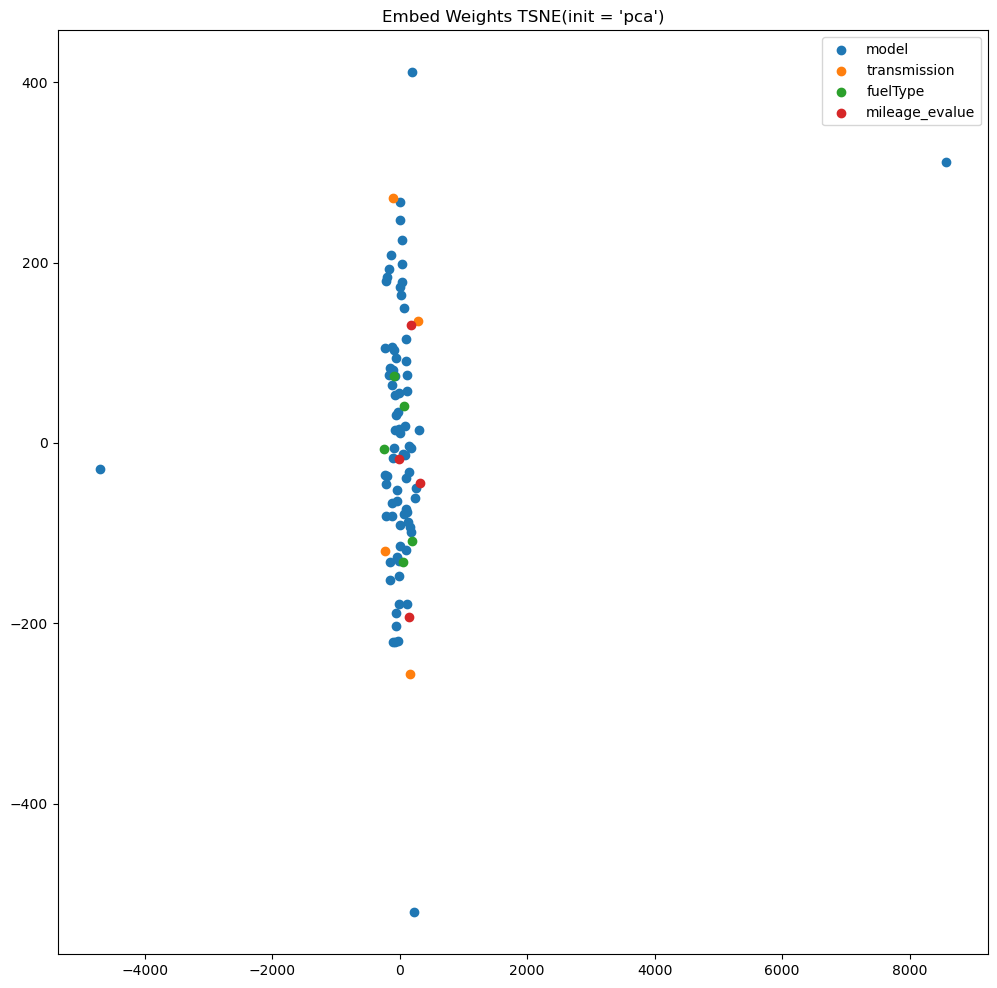

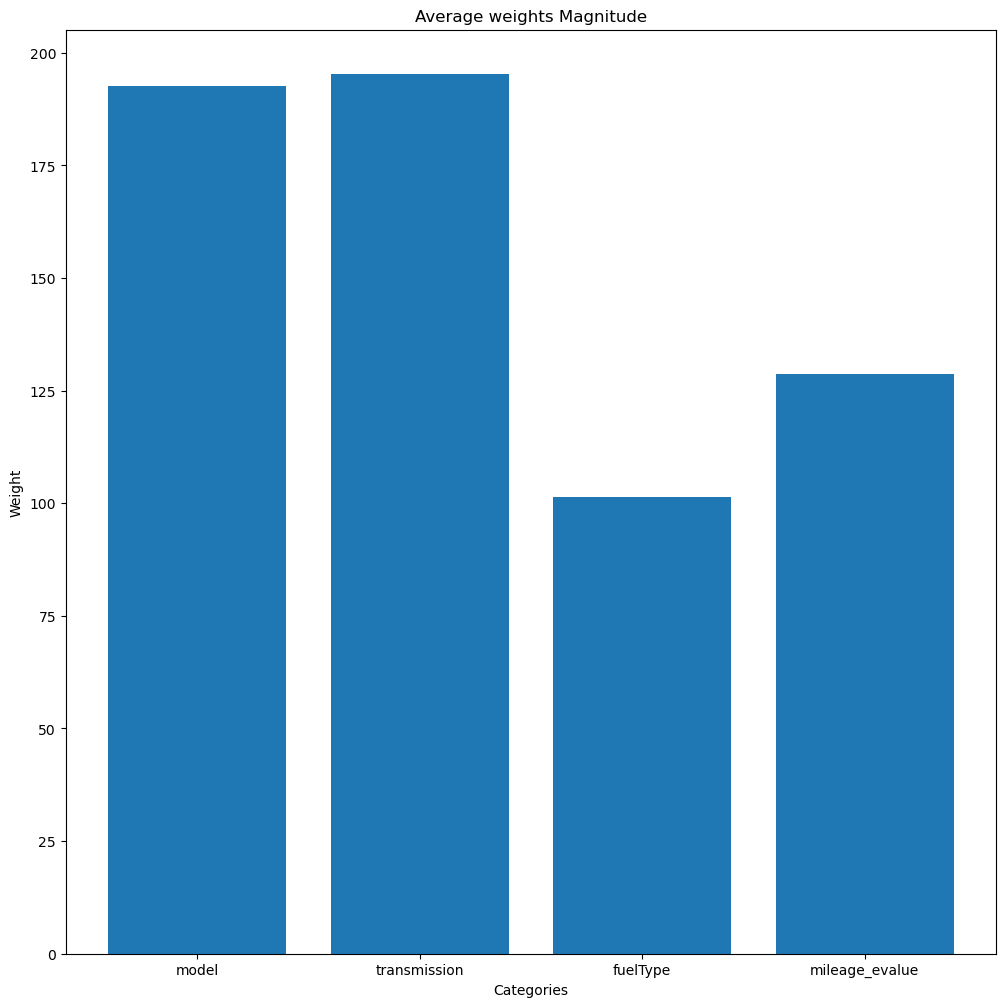

In [109]:
weight_extracted = []
for layer in model_2.layers:

    if 'int_embed' in layer.name:
        weight_extracted.append(layer.get_weights())
# print('==================')
temp_list = weight_extracted
weight_extracted = []
for w in temp_list:
    if len(w):
        weight_extracted.append(w[0])

t = TSNE(n_components=2, init='pca', perplexity = 3, random_state = 1, verbose = 0)

tsneWeights = []
for w in weight_extracted:
    temp_tSNE_weight = t.fit_transform(w)
    tsneWeights.append(temp_tSNE_weight)

plt.figure(figsize=(12,12))
for idx, w in enumerate(tsneWeights):    
    plt.scatter(w[:,0], w[:,1], label = categorical_headers[idx])
plt.title('Embed Weights TSNE(init = \'pca\')')
plt.legend(loc=1)
plt.show()

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticks(range(len(tsneWeights)))
ax.set_xticklabels(categorical_headers)
average_weight = [np.mean(np.absolute(w)) for w in tsneWeights]
ax.bar(range(len(tsneWeights)), average_weight)
plt.xlabel("Categories")
plt.ylabel("Weight")
plt.title("Average weights Magnitude")
plt.show()

With initializing points with PCA, we can see all points have comed together, while the transmission seems like have a relatively even distribution, also can be observed by the histogram, it have the highest average magnitude. Also the model have a higher influence for the model.